# Import thư viện cần thiết

In [ ]:
# Thư viện cho tính toán số học và xử lý dữ liệu bảng
import pandas as pd 
import numpy as np 
import math

# Thư viện cho việc trực quan hóa dữ liệu
import matplotlib.pyplot as plt 
import seaborn as sns 

URL = 'https://www.worldometers.info/coronavirus/' #the website the data is extracted
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

# Đọc dữ liệu

In [ ]:
# Tải dữ liệu và lưu về dạng excel với tên file là THPT_2018_Quoc_gia.xlsx
!wget "https://drive.google.com/uc?export=download&id=1wC_4PpYTYi__0CXVBzJTlpRIMdO_yfrL" -O THPT_2018_Quoc_gia.xlsx

--2021-04-16 15:10:48--  https://drive.google.com/uc?export=download&id=1wC_4PpYTYi__0CXVBzJTlpRIMdO_yfrL
Resolving drive.google.com (drive.google.com)... 172.217.204.139, 172.217.204.101, 172.217.204.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6aqi43nr626n2oeodtqr08v1ibbnm1lm/1618585800000/16973758100827691431/*/1wC_4PpYTYi__0CXVBzJTlpRIMdO_yfrL?e=download [following]
--2021-04-16 15:10:49--  https://doc-10-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6aqi43nr626n2oeodtqr08v1ibbnm1lm/1618585800000/16973758100827691431/*/1wC_4PpYTYi__0CXVBzJTlpRIMdO_yfrL?e=download
Resolving doc-10-bg-docs.googleusercontent.com (doc-10-bg-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-10-bg-docs.googleusercontent.com (d

In [ ]:
# Nếu chạy môi trường localhost thì uncomment câu lệnh này
# df = pd.read_excel('./THPT_2018_Quoc_gia.xlsx')

# Nếu chạy môi trường Google Colab thì run câu lệnh này
df = pd.read_excel('/content/THPT_2018_Quoc_gia.xlsx')

# Xem thông tin dữ liệu

In [ ]:
# Một số giá trị đầu của bảng dữ liệu
df.head()

,ID,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1
0,1,18010226,3.0,3.75,3.0,NaN,NaN,NaN,3.0,6.50,8.25,NaN,NaN,13.25,9.75,NaN
1,2,18010229,8.8,7.50,9.0,NaN,NaN,NaN,6.0,9.00,8.25,NaN,NaN,22.50,25.30,NaN
2,3,18010232,6.0,5.50,4.0,5.75,5.5,5.0,NaN,NaN,NaN,17.25,16.5,NaN,15.50,15.75
3,4,18010242,3.4,5.75,2.6,NaN,NaN,NaN,3.5,4.75,7.25,NaN,NaN,14.00,11.75,NaN
4,5,18010247,3.8,6.75,3.0,NaN,NaN,NaN,3.5,6.25,8.00,NaN,NaN,16.50,13.55,NaN


In [ ]:
# Mô tả dữ liệu
df.describe()

,ID,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1
count,744396.00000,7.443960e+05,741024.000000,728309.000000,659998.000000,323353.000000,326981.000000,319605.000000,446118.000000,433221.000000,379034.000000,321232.000000,319516.000000,432605.000000,656138.000000,307864.000000
mean,372198.50000,3.033333e+07,4.884162,5.444146,3.933543,4.961179,4.864391,4.561249,3.805371,5.483495,7.157468,15.523625,15.124206,14.622717,14.513534,15.042056
std,214888.75983,1.905104e+07,1.440636,1.447793,1.567942,1.531097,1.523851,1.244402,1.241262,1.257440,1.233368,3.633543,3.211462,3.238440,3.341804,3.462336
min,1.00000,1.000019e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,186099.75000,1.500588e+07,3.800000,4.500000,2.800000,3.750000,3.750000,3.750000,3.000000,4.750000,6.500000,13.100000,13.000000,12.500000,12.200000,12.700000
50%,372198.50000,3.200454e+07,5.000000,5.500000,3.600000,5.000000,4.750000,4.500000,3.750000,5.500000,7.250000,15.650000,15.150000,14.500000,14.380000,14.900000
75%,558297.25000,4.700776e+07,6.000000,6.500000,4.600000,6.000000,6.000000,5.250000,4.500000,6.250000,8.000000,18.000000,17.200000,16.750000,16.700000,17.300000
max,744396.00000,6.400622e+07,10.000000,9.750000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,29.050000,29.550000,28.500000,27.850000,28.950000


In [ ]:
# Kiểu dữ liệu của các thuộc tính
df.dtypes

ID          int64
SoBD        int64
Toan      float64
Van       float64
Anh       float64
Ly        float64
Hoa       float64
Sinh      float64
Su        float64
Dia       float64
GDCD      float64
KhoiA     float64
KhoiB     float64
KhoiC     float64
KhoiD     float64
KhoiA1    float64
dtype: object

In [ ]:
# Check null
df.isnull().sum()

ID             0
SoBD           0
Toan        3372
Van        16087
Anh        84398
Ly        421043
Hoa       417415
Sinh      424791
Su        298278
Dia       311175
GDCD      365362
KhoiA     423164
KhoiB     424880
KhoiC     311791
KhoiD      88258
KhoiA1    436532
dtype: int64

In [ ]:
# Chuẩn hóa số báo danh
df['code'] =  np.where(df['SoBD'] > 10000000, df['SoBD'].astype(str).str[:2], df['SoBD'].astype(str).str[:1])
df = df.astype({'code': int})

In [ ]:
# Một số giá trị đầu của bảng dữ liệu
df.head()

,ID,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1,code
0,1,18010226,3.0,3.75,3.0,NaN,NaN,NaN,3.0,6.50,8.25,NaN,NaN,13.25,9.75,NaN,18
1,2,18010229,8.8,7.50,9.0,NaN,NaN,NaN,6.0,9.00,8.25,NaN,NaN,22.50,25.30,NaN,18
2,3,18010232,6.0,5.50,4.0,5.75,5.5,5.0,NaN,NaN,NaN,17.25,16.5,NaN,15.50,15.75,18
3,4,18010242,3.4,5.75,2.6,NaN,NaN,NaN,3.5,4.75,7.25,NaN,NaN,14.00,11.75,NaN,18
4,5,18010247,3.8,6.75,3.0,NaN,NaN,NaN,3.5,6.25,8.00,NaN,NaN,16.50,13.55,NaN,18


In [ ]:
# Mô tả dữ liệu
df.describe()

,ID,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1,code
count,744396.00000,7.443960e+05,741024.000000,728309.000000,659998.000000,323353.000000,326981.000000,319605.000000,446118.000000,433221.000000,379034.000000,321232.000000,319516.000000,432605.000000,656138.000000,307864.000000,744396.000000
mean,372198.50000,3.033333e+07,4.884162,5.444146,3.933543,4.961179,4.864391,4.561249,3.805371,5.483495,7.157468,15.523625,15.124206,14.622717,14.513534,15.042056,30.321701
std,214888.75983,1.905104e+07,1.440636,1.447793,1.567942,1.531097,1.523851,1.244402,1.241262,1.257440,1.233368,3.633543,3.211462,3.238440,3.341804,3.462336,19.057832
min,1.00000,1.000019e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,186099.75000,1.500588e+07,3.800000,4.500000,2.800000,3.750000,3.750000,3.750000,3.000000,4.750000,6.500000,13.100000,13.000000,12.500000,12.200000,12.700000,15.000000
50%,372198.50000,3.200454e+07,5.000000,5.500000,3.600000,5.000000,4.750000,4.500000,3.750000,5.500000,7.250000,15.650000,15.150000,14.500000,14.380000,14.900000,32.000000
75%,558297.25000,4.700776e+07,6.000000,6.500000,4.600000,6.000000,6.000000,5.250000,4.500000,6.250000,8.000000,18.000000,17.200000,16.750000,16.700000,17.300000,47.000000
max,744396.00000,6.400622e+07,10.000000,9.750000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,29.050000,29.550000,28.500000,27.850000,28.950000,64.000000


# Lấy dữ liệu mã tỉnh từ trang Web

In [ ]:
# Đường dẫn trang web để craw dữ liệu mã Sở Giáo dục
base_url = 'https://thuvienphapluat.vn/cong-van/Giao-duc/Cong-van-417-BGDDT-KTKDCLGD-huong-dan-thuc-hien-Quy-che-thi-trung-hoc-pho-thong-quoc-gia-2017-339311.aspx'

In [ ]:
# Craw dữ liệu
craw_data = pd.read_html(base_url)

In [ ]:
# Mã cơ sở là bảng thứ 17 
ma_co_so = craw_data[17]

In [ ]:
# Chuẩn hóa bảng
ma_co_so = ma_co_so.drop(ma_co_so.index[0])
ma_co_so.rename(columns={0: 'code', 1: 'ten co so', 2: 'ma cum co so', 3: 'ten hoi dong thi'}, inplace=True)
ma_co_so = ma_co_so.astype({'code': int})
del ma_co_so['ma cum co so']
del ma_co_so['ten hoi dong thi']

In [ ]:
# Xem một số giá trị của bảng Mã cơ sở 
ma_co_so.head()

,code,ten co so
1,1,Sở GDĐT Hà Nội
2,2,Sở GDĐT TP. Hồ Chí Minh
3,3,Sở GDĐT Hải Phòng
4,4,Sở GDĐT Đà Nẵng
5,5,Sở GDĐT Hà Giang


# Gộp hai bản dữ liệu theo 'code'

In [ ]:
full_join_data = pd.merge(df, ma_co_so, how='outer', on='code')

In [ ]:
full_join_data.head()

,ID,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1,code,ten co so
0,1.0,18010226.0,3.0,3.75,3.0,NaN,NaN,NaN,3.0,6.50,8.25,NaN,NaN,13.25,9.75,NaN,18,Sở GDĐT Bắc Giang
1,2.0,18010229.0,8.8,7.50,9.0,NaN,NaN,NaN,6.0,9.00,8.25,NaN,NaN,22.50,25.30,NaN,18,Sở GDĐT Bắc Giang
2,3.0,18010232.0,6.0,5.50,4.0,5.75,5.5,5.0,NaN,NaN,NaN,17.25,16.5,NaN,15.50,15.75,18,Sở GDĐT Bắc Giang
3,4.0,18010242.0,3.4,5.75,2.6,NaN,NaN,NaN,3.5,4.75,7.25,NaN,NaN,14.00,11.75,NaN,18,Sở GDĐT Bắc Giang
4,5.0,18010247.0,3.8,6.75,3.0,NaN,NaN,NaN,3.5,6.25,8.00,NaN,NaN,16.50,13.55,NaN,18,Sở GDĐT Bắc Giang


In [ ]:
full_join_data.groupby(['code'])['Toan'].describe()

,count,mean,std,min,25%,50%,75%,max
code,,,,,,,,
1,37993.0,5.304288,1.547857,0.0,4.2,5.6,6.4,9.6
2,78035.0,5.413035,1.241950,0.0,4.6,5.4,6.2,10.0
3,5094.0,5.256969,1.452611,0.8,4.2,5.4,6.4,9.2
4,6094.0,5.117788,1.442155,1.2,4.0,5.2,6.2,9.6
5,3089.0,3.494335,1.433978,1.0,2.6,3.2,4.2,9.6
...,...,...,...,...,...,...,...,...
61,9222.0,4.618933,1.268969,0.8,3.8,4.6,5.6,8.8
62,5372.0,4.114222,1.311870,0.4,3.2,4.0,5.0,9.6
63,6327.0,4.673020,1.375097,0.2,3.6,4.6,5.6,8.8


# Rút trích dữ liệu điểm thi Toán của Hà Giang

In [ ]:
math_df_ha_giang = df[df['code'] == 5]['Toan']

In [ ]:
math_df_ha_giang.head()

47345    1.4
47346    5.6
47347    3.8
47348    2.4
47349    9.4
Name: Toan, dtype: float64

# Rút trích dữ liệu điểm thi Toán của các tỉnh còn lại

In [ ]:
math_df_cac_tinh_con_lai = df[df['code'] != 5]['Toan']

In [ ]:
math_df_cac_tinh_con_lai.head()

0    3.0
1    8.8
2    6.0
3    3.4
4    3.8
Name: Toan, dtype: float64

# Trực quan hóa dữ liệu điểm Toán của Hà Giang so với các tỉnh còn lại
Sử dụng seaborn trực quan hóa phân phố điểm toán
Ta nhận ra điểm bất thường trong phân bố điểm Toán của Hà Giang

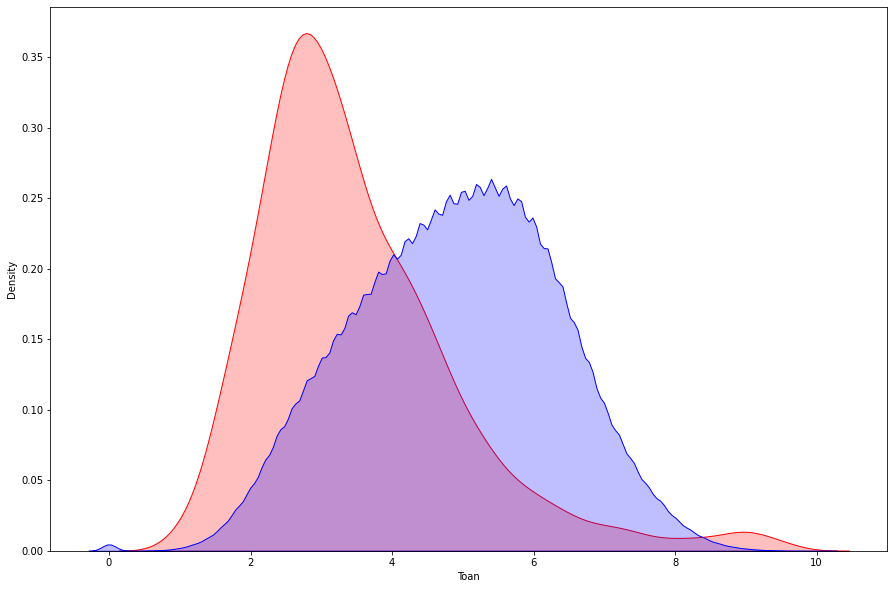

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig = sns.kdeplot(math_df_ha_giang, shade=True, color="r")
fig = sns.kdeplot(math_df_cac_tinh_con_lai, shade=True, color="b")
plt.show()

# Trực quan hóa dữ liệu điểm Vật lý của Hà Giang so với các tỉnh còn lại
Sử dụng seaborn trực quan hóa phân phố điểm Vật lý
Ta nhận ra điểm bất thường trong phân bố điểm Toán của Hà Giang

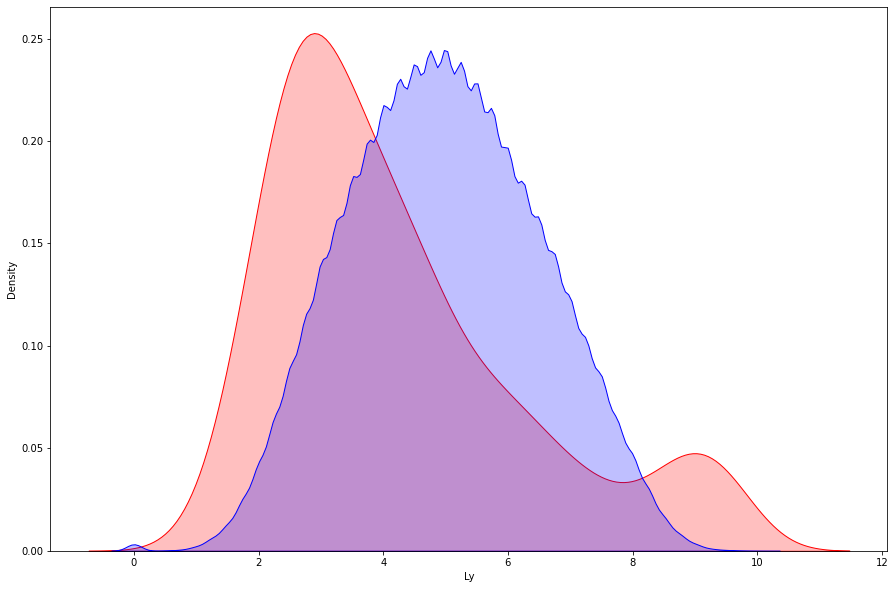

In [ ]:
physics_df_ha_giang = df[df['code'] == 5]['Ly'].dropna()
physics_df_cac_tinh_con_lai = df[df['code'] != 5]['Ly'].dropna()
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig = sns.kdeplot(physics_df_ha_giang, shade=True, color="r")
fig = sns.kdeplot(physics_df_cac_tinh_con_lai, shade=True, color="b")
plt.show()

# Trực quan hóa dữ liệu điểm Hóa của Hà Giang so với các tỉnh còn lại
Sử dụng seaborn trực quan hóa phân phố điểm Hóa học <br>
Ta nhận ra điểm bất thường trong phân bố điểm Hóa học  của Hà Giang

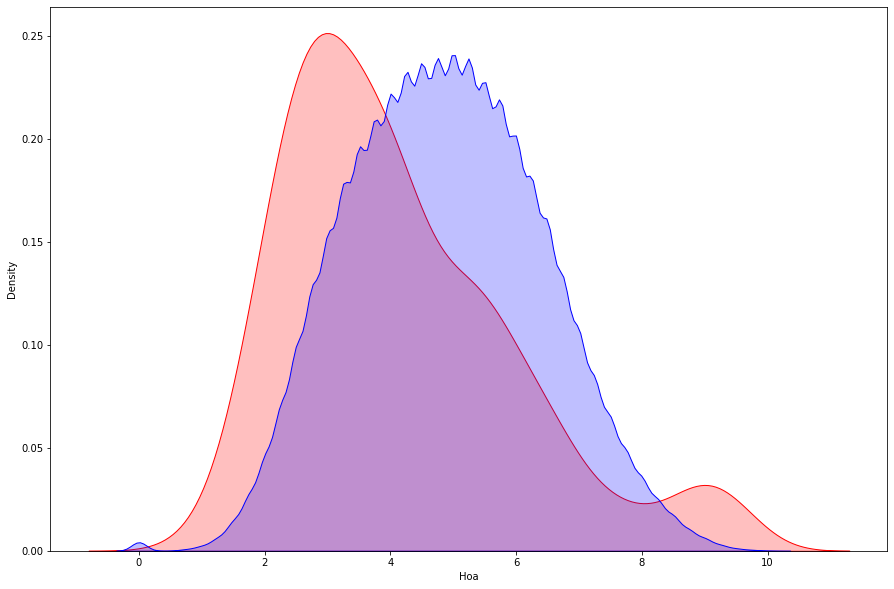

In [ ]:
chemistry_df_ha_giang = df[df['code'] == 5]['Hoa'].dropna()
chemistry_df_cac_tinh_con_lai = df[df['code'] != 5]['Hoa'].dropna()
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig = sns.kdeplot(chemistry_df_ha_giang, shade=True, color="r")
fig = sns.kdeplot(chemistry_df_cac_tinh_con_lai, shade=True, color="b")
plt.show()

# Trực quan hóa dữ liệu điểm Sinh của Hà Giang so với các tỉnh còn lại
Sử dụng seaborn trực quan hóa phân phố điểm Sinh học <br>
Ta nhận ra điểm bất thường trong phân bố điểm Sinh học của Hà Giang

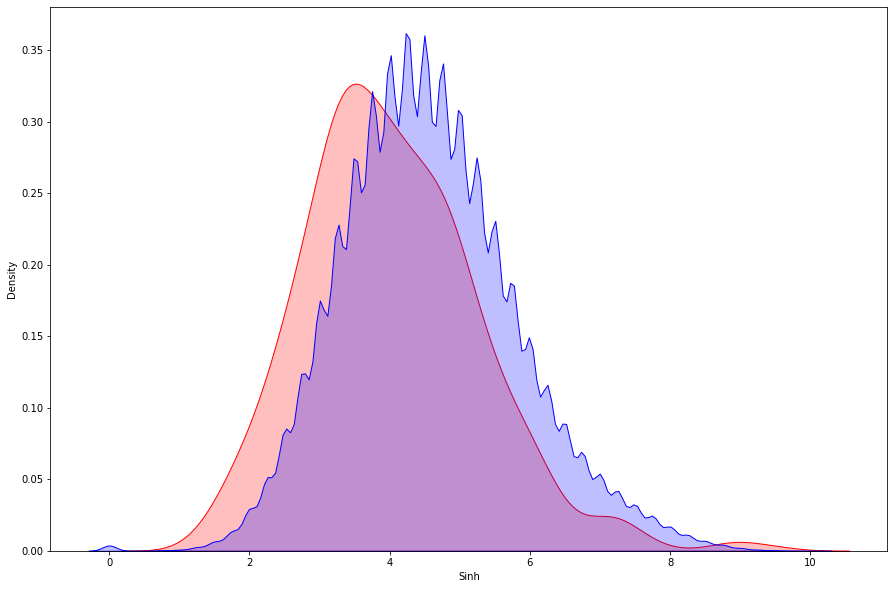

In [ ]:
bio_df_ha_giang = df[df['code'] == 5]['Sinh'].dropna()
bio_df_cac_tinh_con_lai = df[df['code'] != 5]['Sinh'].dropna()
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig = sns.kdeplot(bio_df_ha_giang, shade=True, color="r")
fig = sns.kdeplot(bio_df_cac_tinh_con_lai, shade=True, color="b")
plt.show()

# Trực quan hóa dữ liệu điểm Văn của Hà Giang so với các tỉnh còn lại
Sử dụng seaborn trực quan hóa phân phố điểm Văn

Ta nhận ra điểm bất thường trong phân bố điểm Văn của Hà Giang

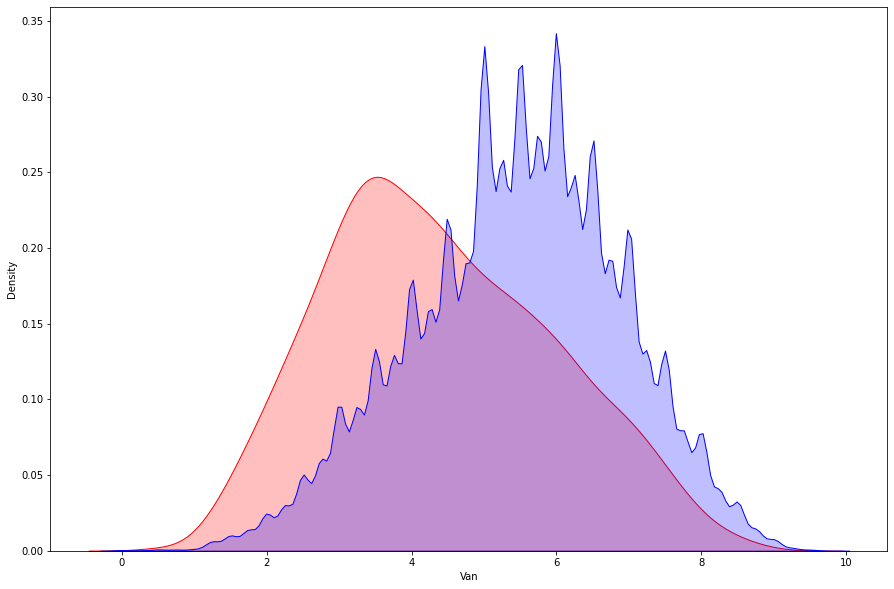

In [ ]:
literature_df_ha_giang = df[df['code'] == 5]['Van'].dropna()
literature_df_cac_tinh_con_lai = df[df['code'] != 5]['Van'].dropna()
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig = sns.kdeplot(literature_df_ha_giang, shade=True, color="r")
fig = sns.kdeplot(literature_df_cac_tinh_con_lai, shade=True, color="b")
plt.show()

# Trực quan hóa dữ liệu điểm Anh của Hà Giang so với các tỉnh còn lại
Sử dụng seaborn trực quan hóa phân phố điểm Anh

Ta nhận ra điểm bất thường trong phân bố điểm Anh của Hà Giang

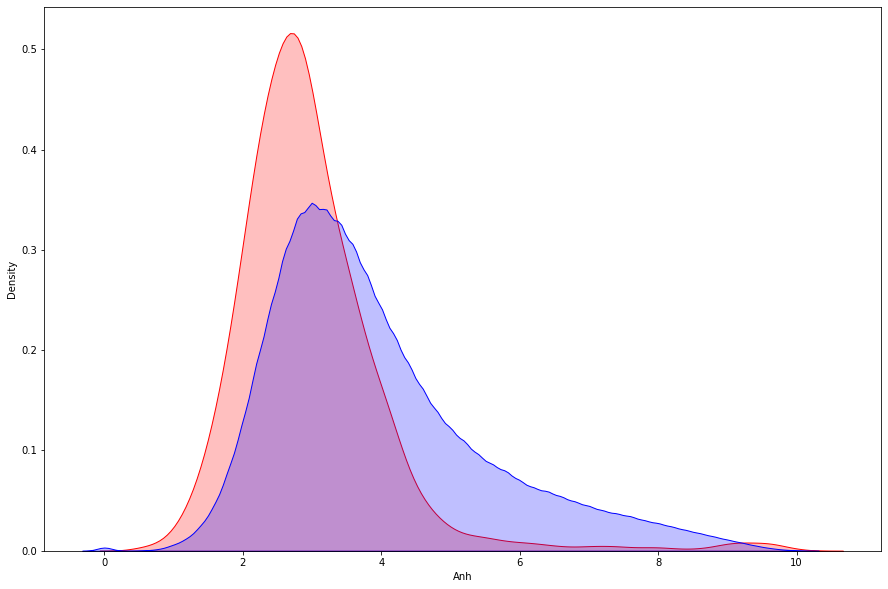

In [ ]:
english_df_ha_giang = df[df['code'] == 5]['Anh'].dropna()
english_df_cac_tinh_con_lai = df[df['code'] != 5]['Anh'].dropna()
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig = sns.kdeplot(english_df_ha_giang, shade=True, color="r")
fig = sns.kdeplot(english_df_cac_tinh_con_lai, shade=True, color="b")
plt.show()

# Trực quan hóa dữ liệu điểm Sử của Hà Giang so với các tỉnh còn lại
Sử dụng seaborn trực quan hóa phân phố điểm Lịch Sử

Ta nhận ra điểm bất thường trong phân bố điểm Lịch Sử của Hà Giang

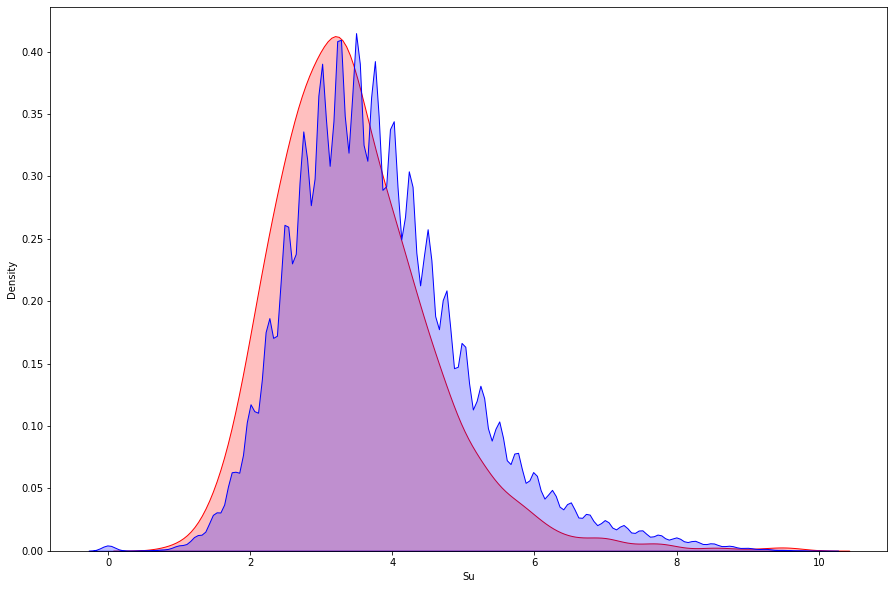

In [ ]:
history_df_ha_giang = df[df['code'] == 5]['Su'].dropna()
history_df_cac_tinh_con_lai = df[df['code'] != 5]['Su'].dropna()
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig = sns.kdeplot(history_df_ha_giang, shade=True, color="r")
fig = sns.kdeplot(history_df_cac_tinh_con_lai, shade=True, color="b")
plt.show()

# Trực quan hóa dữ liệu điểm Địa lý của Hà Giang so với các tỉnh còn lại
Sử dụng seaborn trực quan hóa phân phố điểm Địa Lý

Ta nhận ra điểm bất thường trong phân bố điểm Địa Lý của Hà Giang

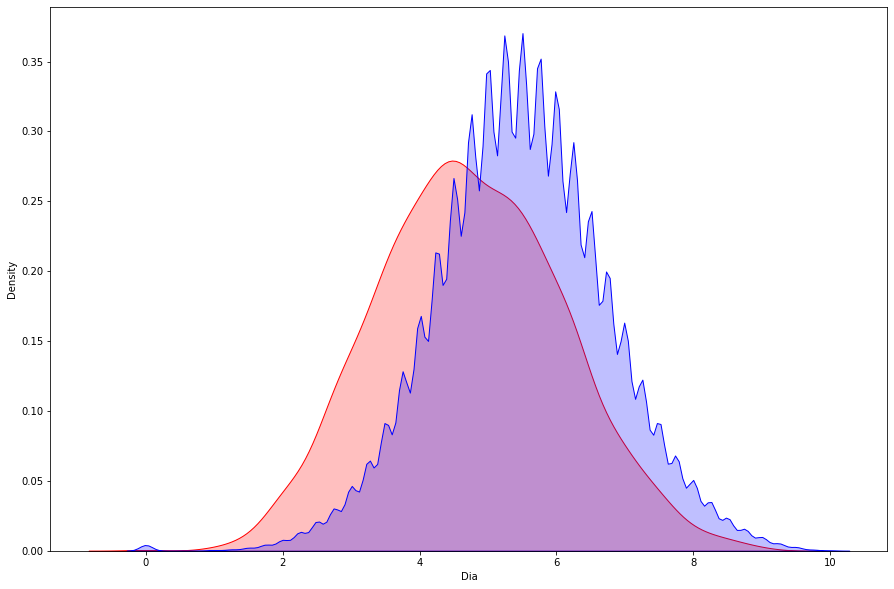

In [ ]:
geo_df_ha_giang = df[df['code'] == 5]['Dia'].dropna()
geo_df_cac_tinh_con_lai = df[df['code'] != 5]['Dia'].dropna()
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig = sns.kdeplot(geo_df_ha_giang, shade=True, color="r")
fig = sns.kdeplot(geo_df_cac_tinh_con_lai, shade=True, color="b")
plt.show()

# Trực quan hóa dữ liệu điểm Giáo dục Công Dân của Hà Giang so với các tỉnh còn lại
Sử dụng seaborn trực quan hóa phân phố điểm GDCD

Ta nhận ra điểm bất thường trong phân bố điểm GDCD của Hà Giang

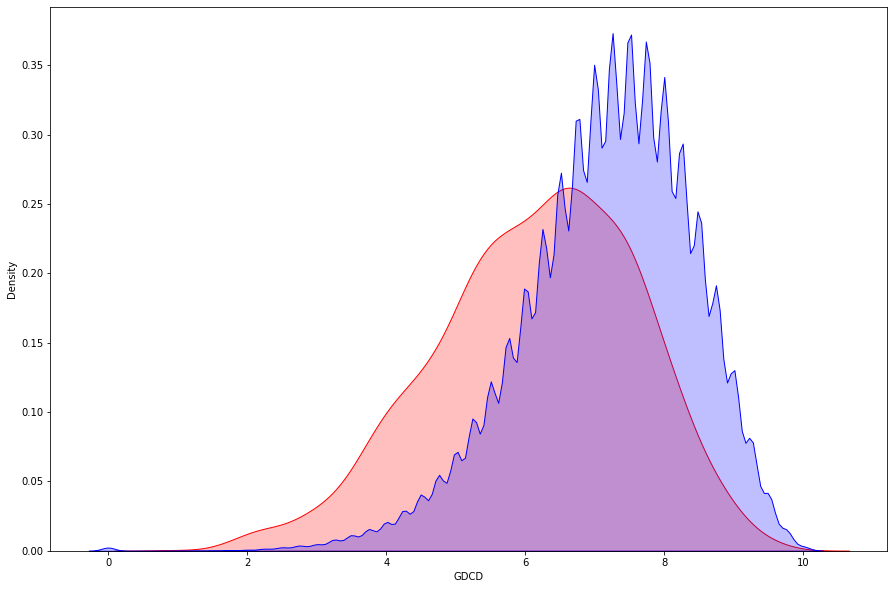

In [ ]:
gdcd_df_ha_giang = df[df['code'] == 5]['GDCD'].dropna()
gdcd_df_cac_tinh_con_lai = df[df['code'] != 5]['GDCD'].dropna()
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig = sns.kdeplot(gdcd_df_ha_giang, shade=True, color="r")
fig = sns.kdeplot(gdcd_df_cac_tinh_con_lai, shade=True, color="b")
plt.show()

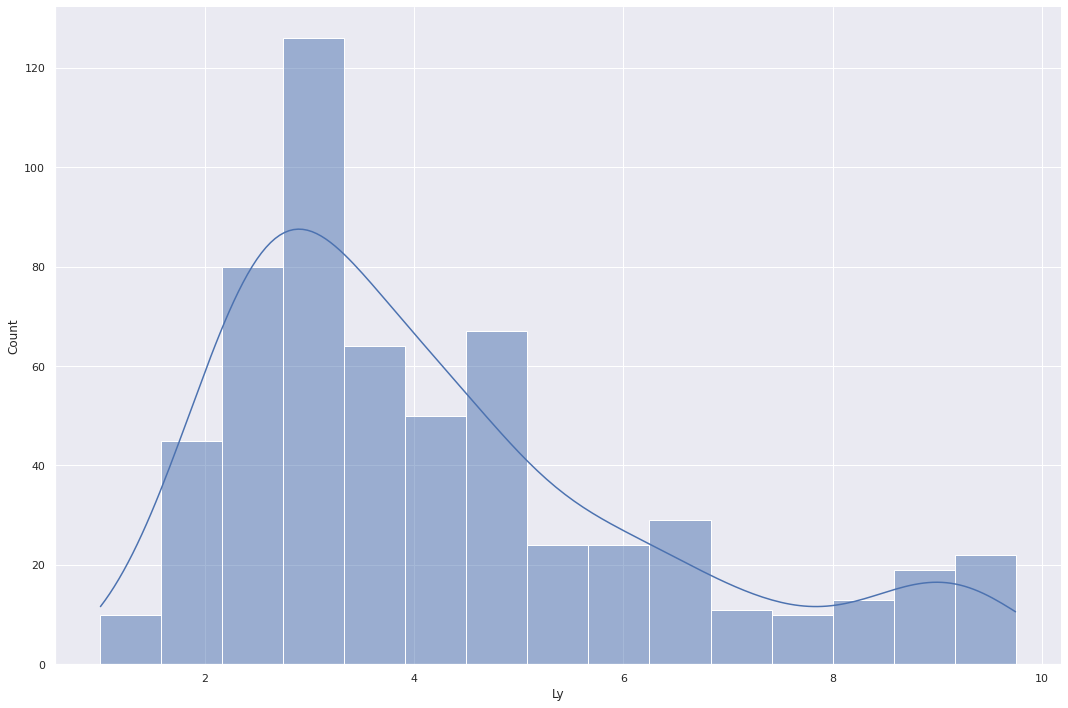

In [ ]:
sns.set(style='darkgrid')
ax = sns.displot(physics_df_ha_giang, kde = True, color='b', height=10, aspect=15/10)
plt.show()

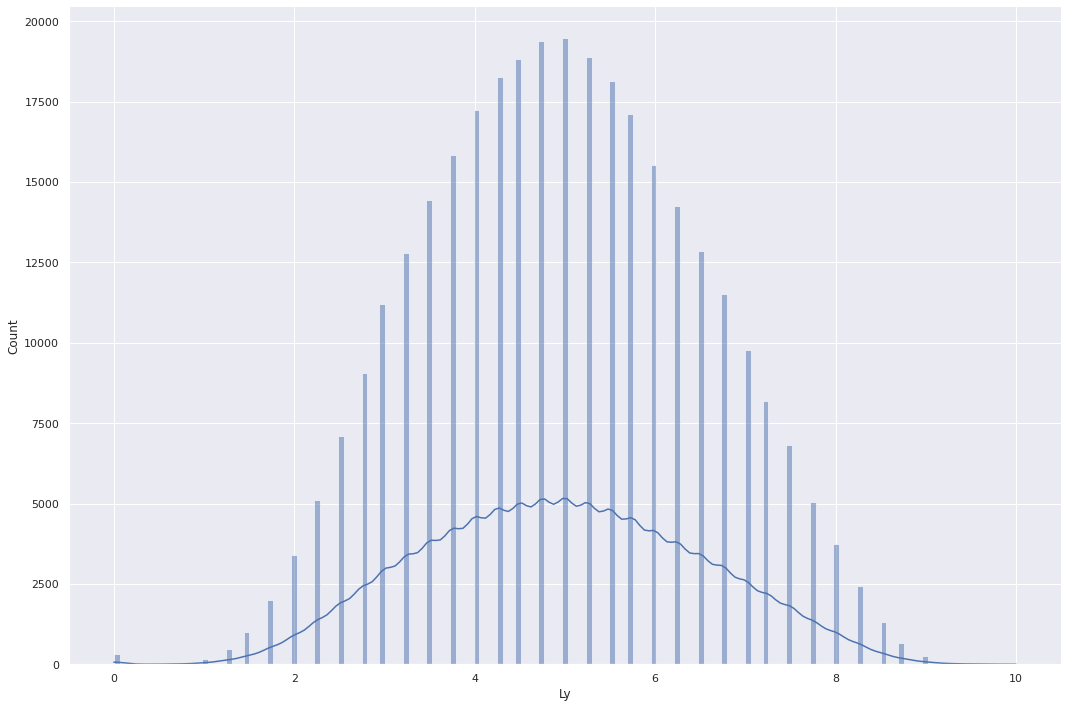

In [ ]:
sns.set(style='darkgrid')
ax = sns.displot(physics_df_cac_tinh_con_lai, kde = True, color='b', height=10, aspect=15/10)
plt.show()

# Phân tích theo khối thi

In [ ]:
df_khoi_A = df[['code', 'Toan', 'Ly', 'Hoa', 'KhoiA']].dropna()
df_khoi_B = df[['code', 'Toan', 'Hoa', 'Sinh', 'KhoiB']].dropna()
df_khoi_C = df[['code', 'Van', 'Su', 'Dia', 'KhoiC']].dropna()
df_khoi_A1 = df[['code', 'Toan', 'Ly', 'Anh', 'KhoiA1']].dropna()
df_khoi_D = df[['code', 'Toan', 'Van', 'Anh', 'KhoiA1']].dropna()

In [ ]:
df_khoi_A[df_khoi_A['code'] != 5][['Toan', 'Ly', 'Hoa']].mean()

Toan    5.699378
Ly      4.965741
Hoa     4.862921
dtype: float64

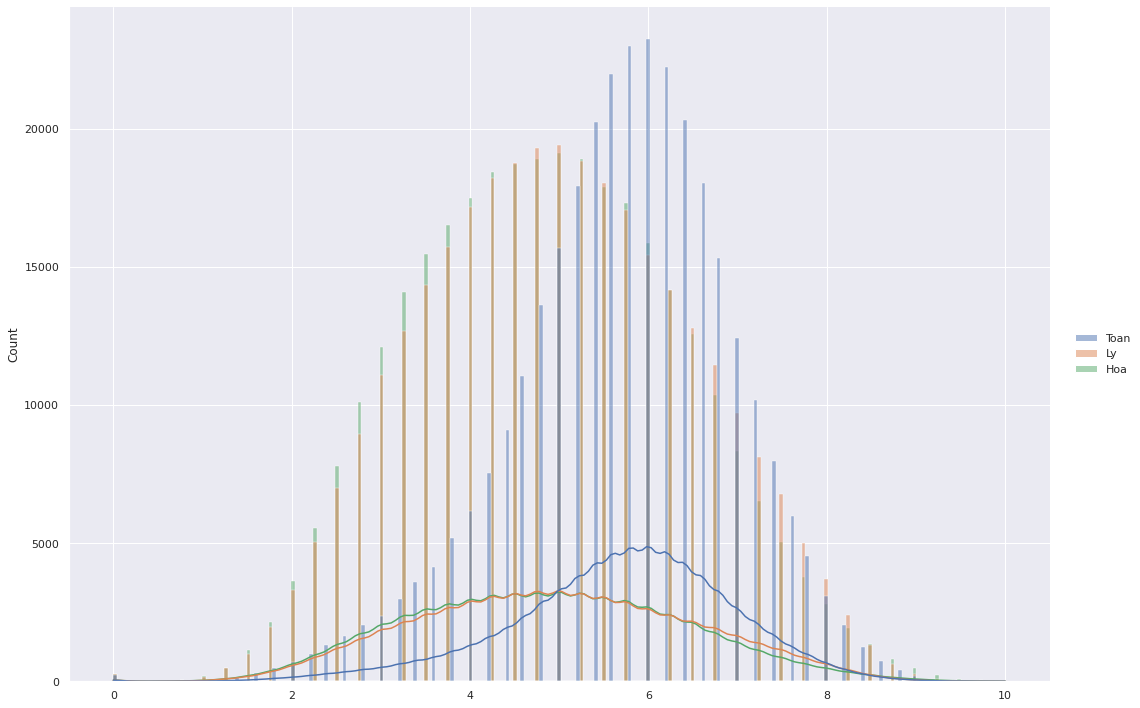

In [ ]:
sns.set(style='darkgrid')
ax = sns.displot(df_khoi_A[df_khoi_A['code'] != 5][['Toan', 'Ly', 'Hoa']], kde = True, color='b', height=10, aspect=15/10)
plt.show()

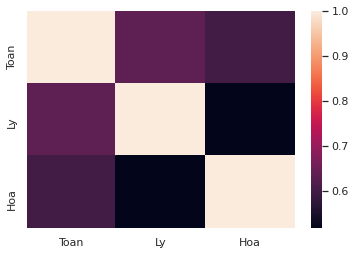

In [ ]:
# Heatmap tương quan trong điểm khối A
sns.heatmap(df_khoi_A[df_khoi_A['code'] != 5][['Toan', 'Ly', 'Hoa']].corr())
plt.show()

In [ ]:
df_khoi_A[df_khoi_A['code'] == 5][['Toan', 'Ly', 'Hoa']].mean()

Toan    4.740448
Ly      4.215577
Hoa     4.130809
dtype: float64

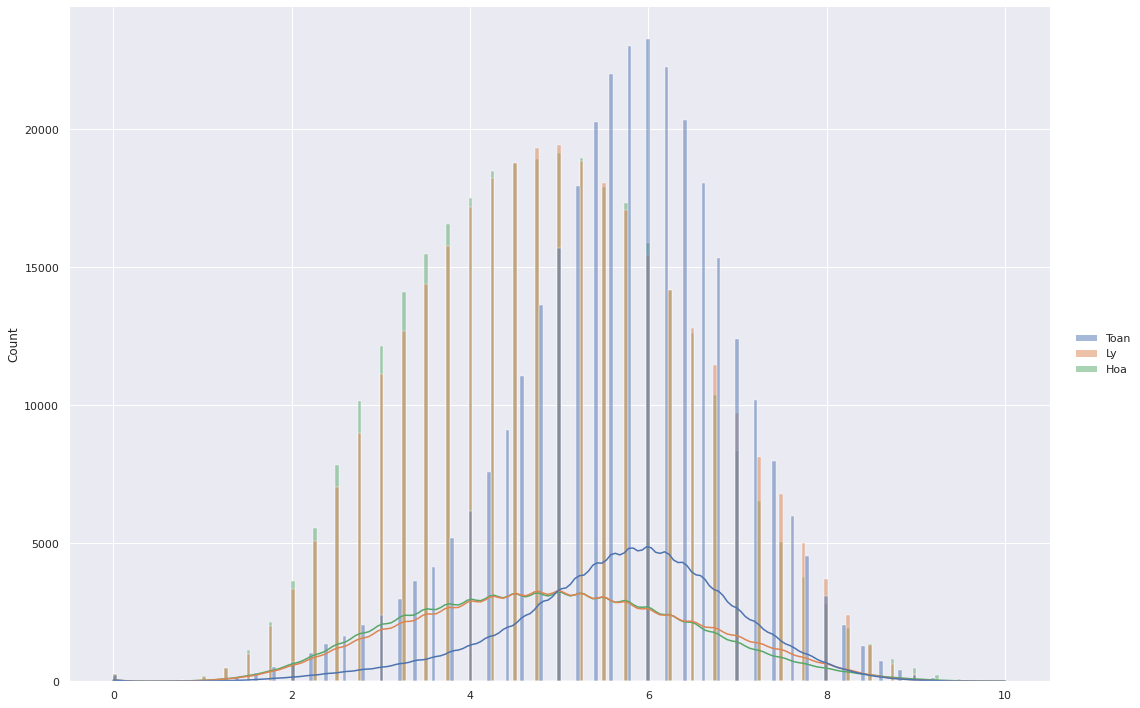

In [ ]:
# Histogram mô tả phổ điểm khối A
sns.set(style='darkgrid')
sns.displot(df_khoi_A[['Toan', 'Ly', 'Hoa']], kde = True, color='b', height=10, aspect=15/10)
plt.show()

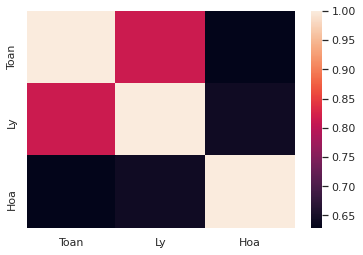

In [ ]:
# Heatmap tương quan trong điểm khối A ở Hà Giang
sns.heatmap(df_khoi_A[df_khoi_A['code'] == 5][['Toan', 'Ly', 'Hoa']].corr())
plt.show()

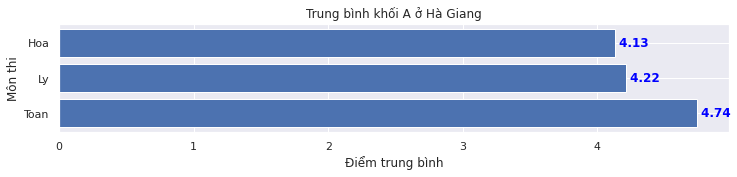

In [ ]:
# Trực quan hóa điểm trung bình các môn thi khối A ở Hà Giang
khoi_a_ha_giang = df_khoi_A[df_khoi_A['code'] == 5]
khoi_cac_tinh_con_lai = df_khoi_A[df_khoi_A['code'] != 5]

y = ['Toan','Ly','Hoa']
width = [khoi_a_ha_giang['Toan'].mean(),khoi_a_ha_giang['Ly'].mean(),khoi_a_ha_giang['Hoa'].mean()]

plt.figure(figsize = (12,2))
plt.barh(y = y, 
         width = width)
plt.title('Trung bình khối A ở Hà Giang')
plt.xlabel('Điểm trung bình')
plt.ylabel('Môn thi')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.show()

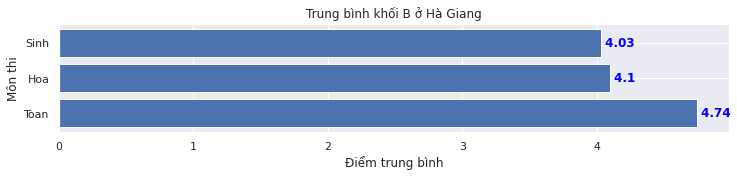

In [ ]:
# Trực quan hóa điểm trung bình các môn thi khối B ở Hà Giang
khoi_b_ha_giang = df_khoi_B[df_khoi_B['code'] == 5]
khoi_b_cac_tinh_con_lai = df_khoi_B[df_khoi_B['code'] != 5]

y = ['Toan','Hoa','Sinh']
width = [khoi_b_ha_giang['Toan'].mean(), khoi_b_ha_giang['Hoa'].mean(), khoi_b_ha_giang['Sinh'].mean()]

plt.figure(figsize = (12,2))
plt.barh(y = y, 
         width = width)
plt.title('Trung bình khối B ở Hà Giang')
plt.xlabel('Điểm trung bình')
plt.ylabel('Môn thi')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.show()

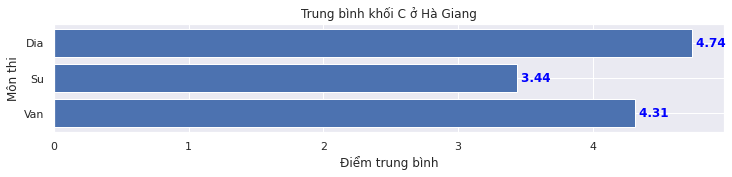

In [ ]:
# Trực quan hóa điểm trung bình các môn thi khối C ở Hà Giang
khoi_c_ha_giang = df_khoi_C[df_khoi_C['code'] == 5]
khoi_c_cac_tinh_con_lai = df_khoi_C[df_khoi_C['code'] != 5]

y = ['Van','Su','Dia']
width = [khoi_c_ha_giang['Van'].mean(), khoi_c_ha_giang['Su'].mean(), khoi_c_ha_giang['Dia'].mean()]

plt.figure(figsize = (12,2))
plt.barh(y = y, 
         width = width)
plt.title('Trung bình khối C ở Hà Giang')
plt.xlabel('Điểm trung bình')
plt.ylabel('Môn thi')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.show()

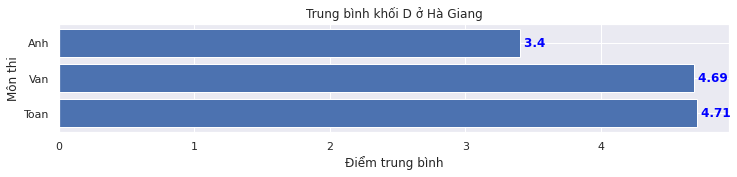

In [ ]:
# Trực quan hóa điểm trung bình các môn thi khối D ở Hà Giang
khoi_d_ha_giang = df_khoi_D[df_khoi_D['code'] == 5]
khoi_d_cac_tinh_con_lai = df_khoi_D[df_khoi_D['code'] != 5]

y = ['Toan','Van','Anh']
width = [khoi_d_ha_giang['Toan'].mean(), khoi_d_ha_giang['Van'].mean(), khoi_d_ha_giang['Anh'].mean()]

plt.figure(figsize = (12,2))
plt.barh(y = y, 
         width = width)
plt.title('Trung bình khối D ở Hà Giang')
plt.xlabel('Điểm trung bình')
plt.ylabel('Môn thi')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.show()

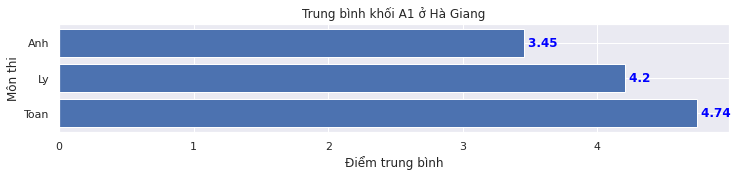

In [ ]:
# Trực quan hóa điểm trung bình các môn thi khối A1 ở Hà Giang
khoi_a1_ha_giang = df_khoi_A1[df_khoi_A1['code'] == 5]
khoi_a1_cac_tinh_con_lai = df_khoi_A1[df_khoi_A1['code'] != 5]

y = ['Toan','Ly','Anh']
width = [khoi_a1_ha_giang['Toan'].mean(), khoi_a1_ha_giang['Ly'].mean(), khoi_a1_ha_giang['Anh'].mean()]

plt.figure(figsize = (12,2))
plt.barh(y = y, 
         width = width)
plt.title('Trung bình khối A1 ở Hà Giang')
plt.xlabel('Điểm trung bình')
plt.ylabel('Môn thi')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.show()

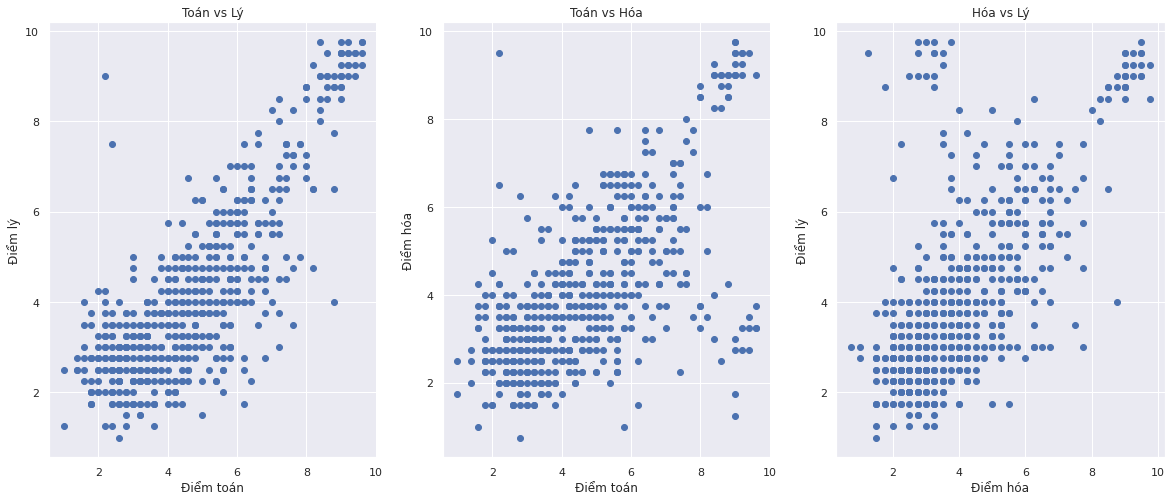

In [ ]:
# Biểu đồ phân tán thể hiện mỗi tương quan dữ liệu trong điểm thi khối A ở Hà Giang
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
plt.scatter(khoi_a_ha_giang['Toan'],khoi_a_ha_giang['Ly'])
plt.title('Toán vs Lý')
plt.xlabel('Điểm toán')
plt.ylabel('Điểm lý')

plt.subplot(1,3,2)
plt.scatter(khoi_a_ha_giang['Toan'],khoi_a_ha_giang['Hoa'])
plt.title('Toán vs Hóa')
plt.xlabel('Điểm toán')
plt.ylabel('Điểm hóa')

plt.subplot(1,3,3)
plt.scatter(khoi_a_ha_giang['Hoa'],khoi_a_ha_giang['Ly'])
plt.title('Hóa vs Lý')
plt.xlabel('Điểm hóa')
plt.ylabel('Điểm lý')

plt.show()

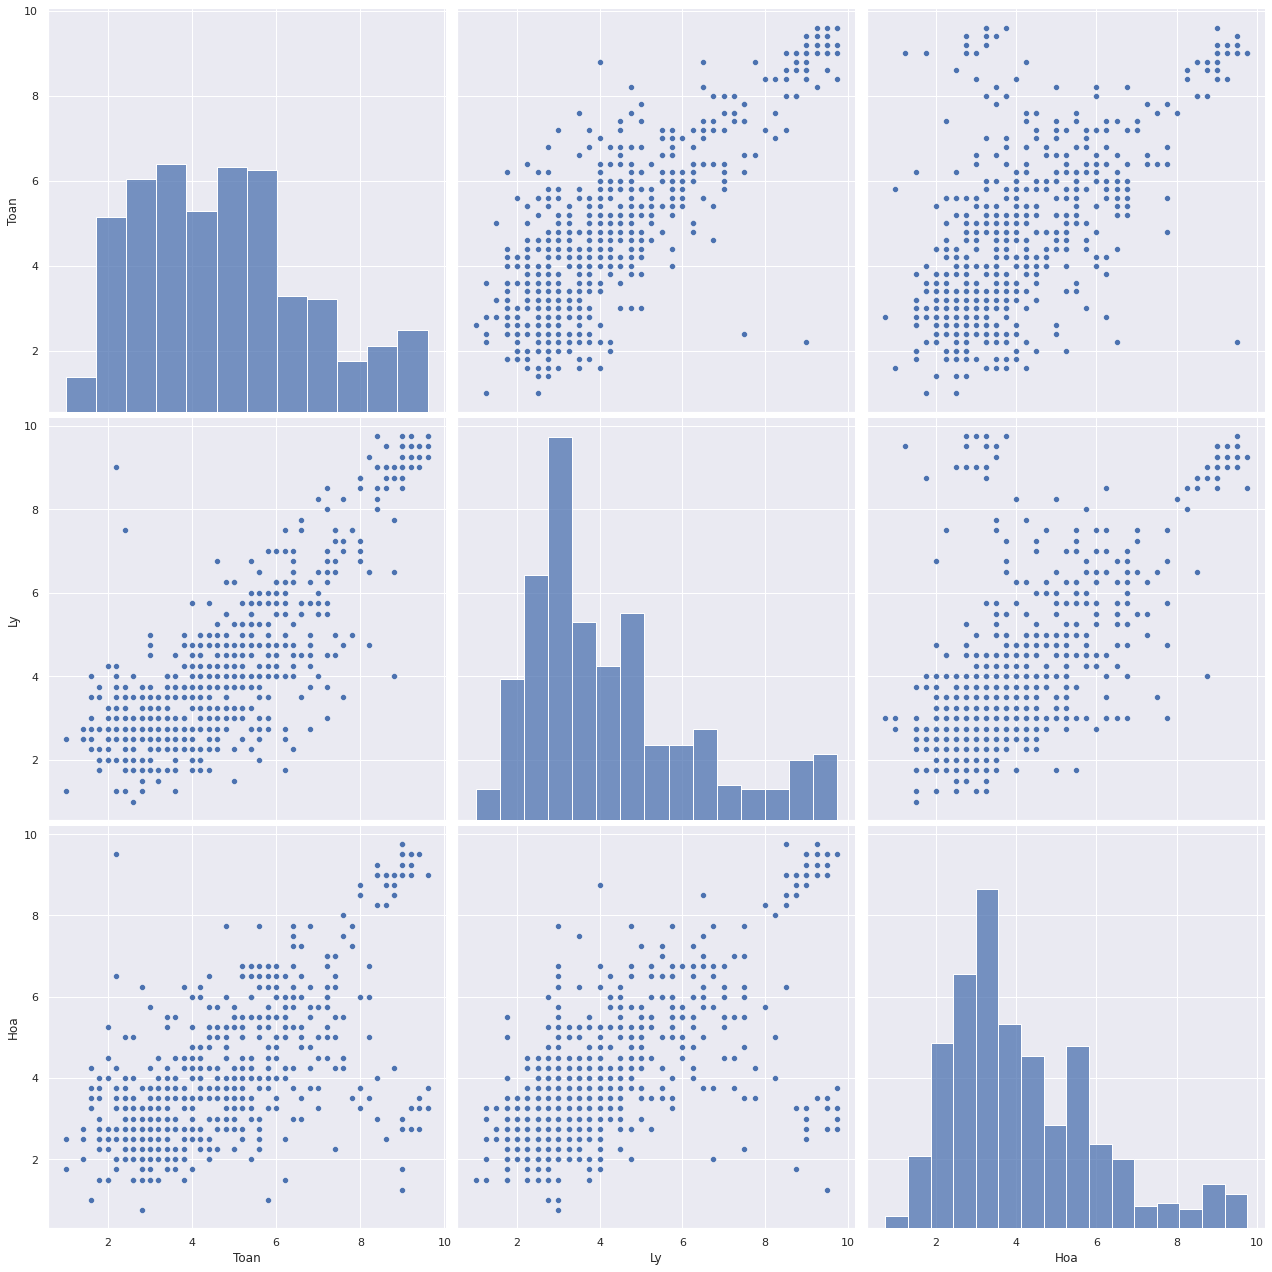

In [ ]:
# Biểu pair plot kết hợp giữa scatter plot và distribution plot cho điểm khối A ở Hà Giang
sns.pairplot(khoi_a_ha_giang[['Toan', 'Ly', 'Hoa']], height=6, aspect=6/6)
plt.show()

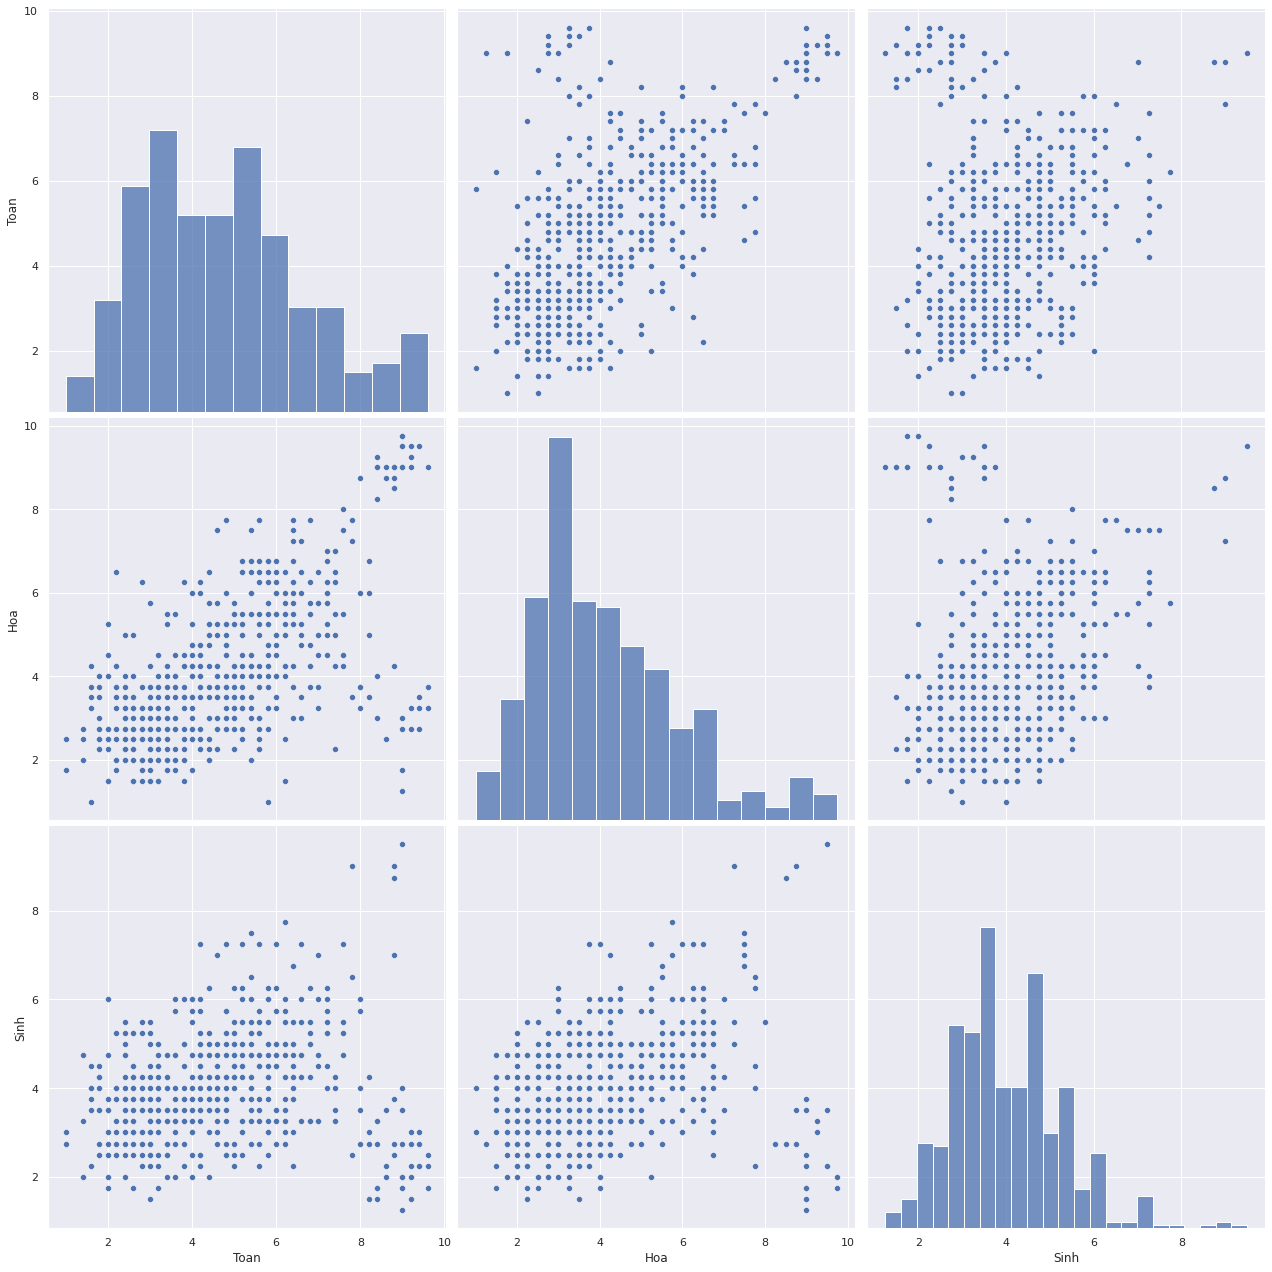

In [ ]:
# Biểu pair plot kết hợp giữa scatter plot và distribution plot cho điểm khối B ở Hà Giang
sns.pairplot(khoi_b_ha_giang[['Toan', 'Hoa', 'Sinh']], height=6, aspect=6/6)
plt.show()

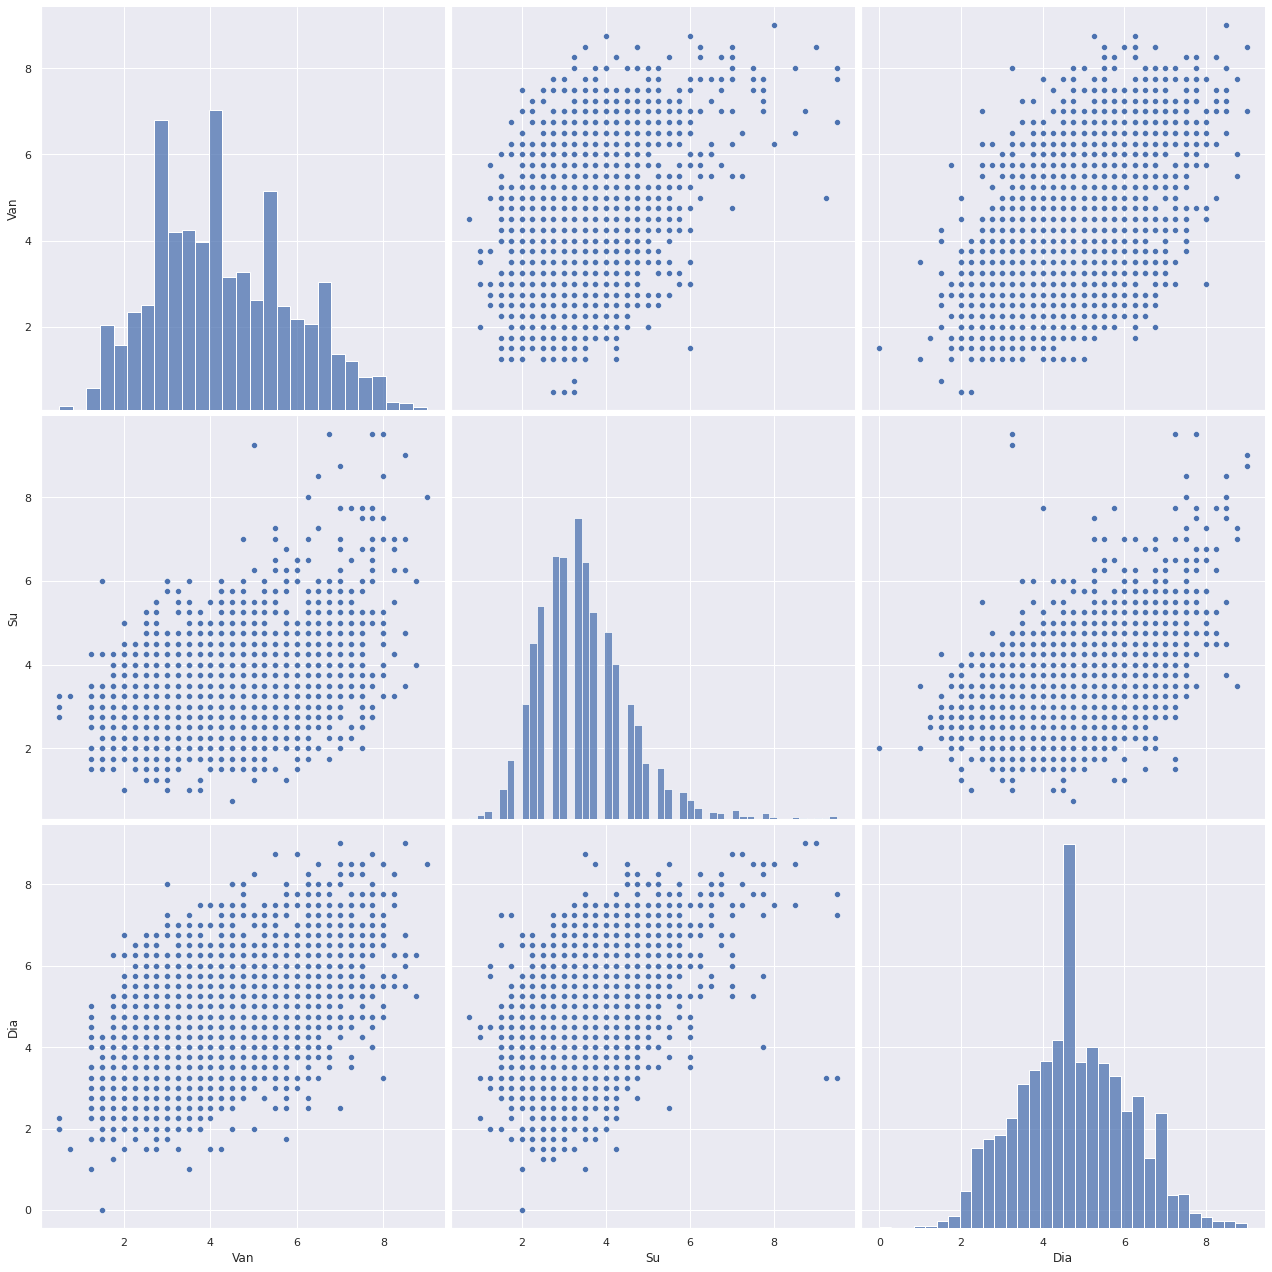

In [ ]:
# Biểu pair plot kết hợp giữa scatter plot và distribution plot cho điểm khối C ở Hà Giang
sns.pairplot(khoi_c_ha_giang[['Van', 'Su', 'Dia']], height=6, aspect=6/6)
plt.show()

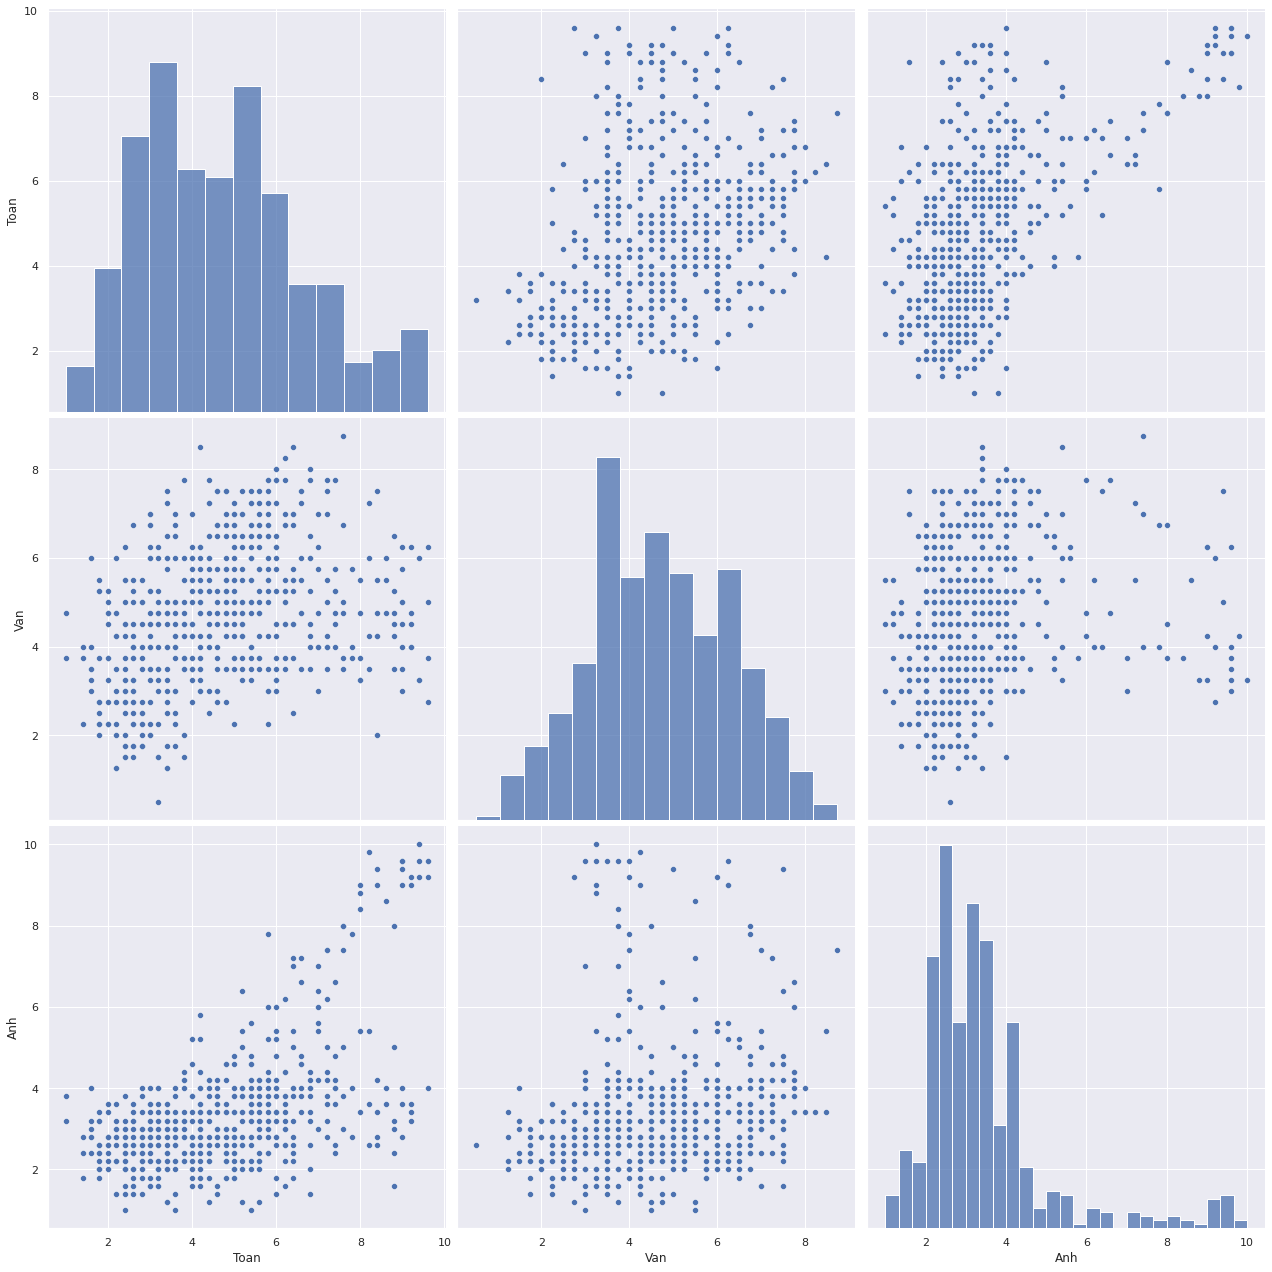

In [ ]:
# Biểu pair plot kết hợp giữa scatter plot và distribution plot cho điểm khối D ở Hà Giang
sns.pairplot(khoi_d_ha_giang[['Toan', 'Van', 'Anh']], height=6, aspect=6/6)
plt.show()

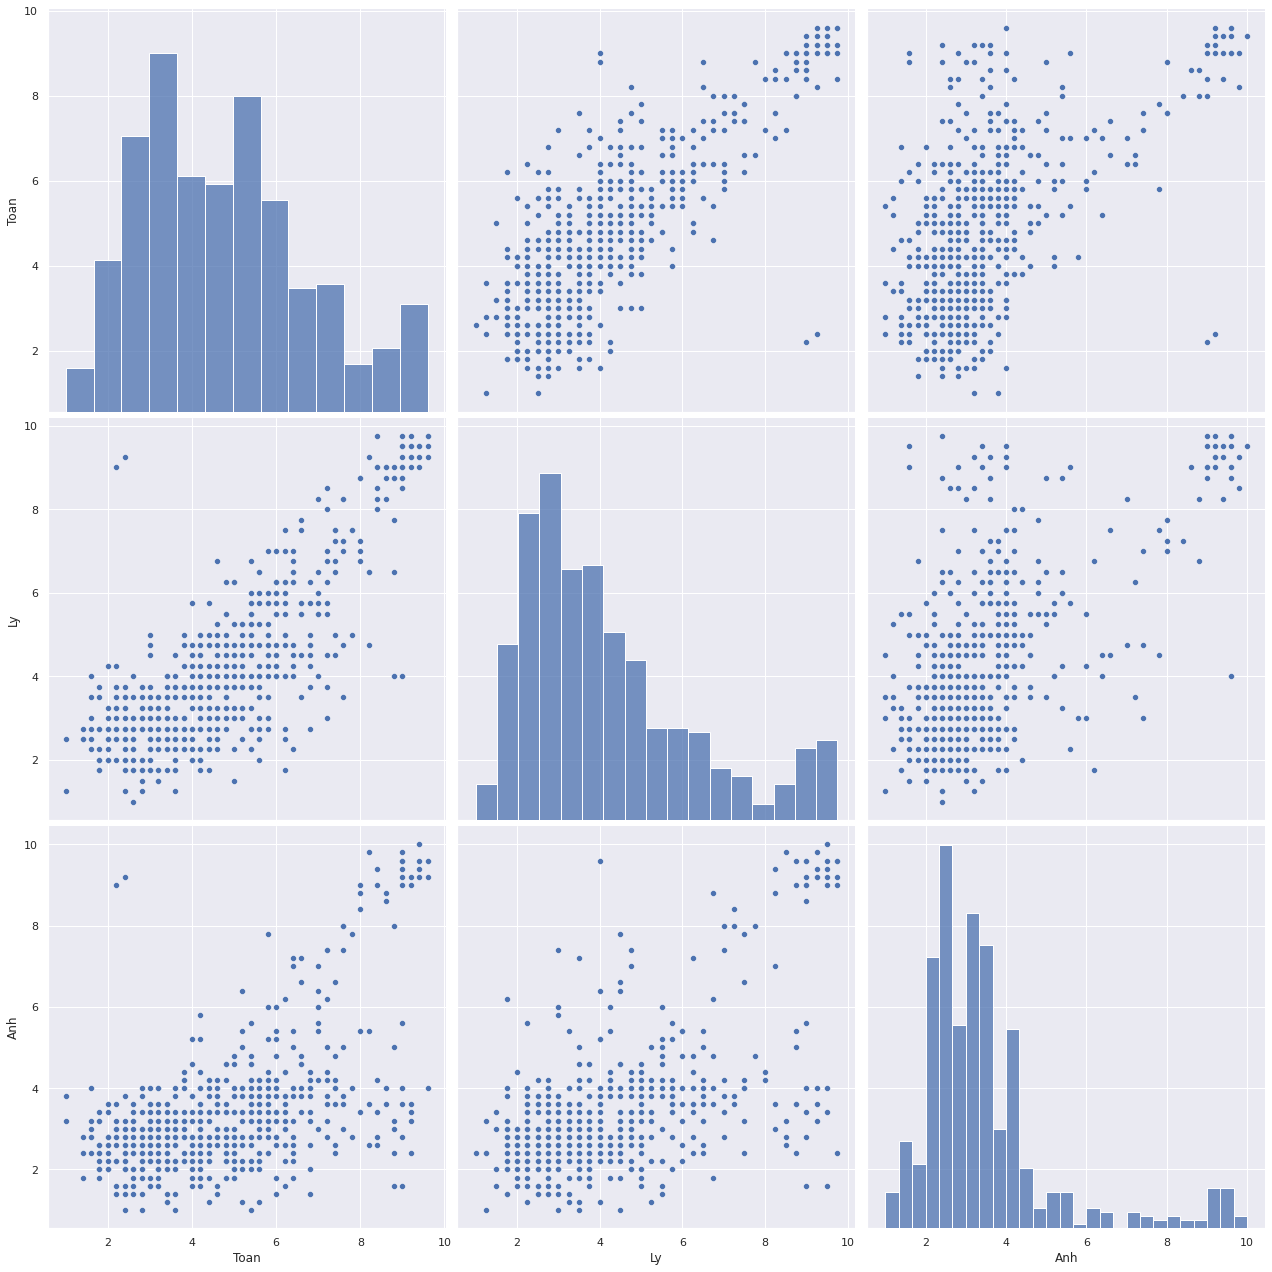

In [ ]:
# Biểu pair plot kết hợp giữa scatter plot và distribution plot cho điểm khối D ở Hà Giang
sns.pairplot(khoi_a1_ha_giang[['Toan', 'Ly', 'Anh']], height=6, aspect=6/6)
plt.show()

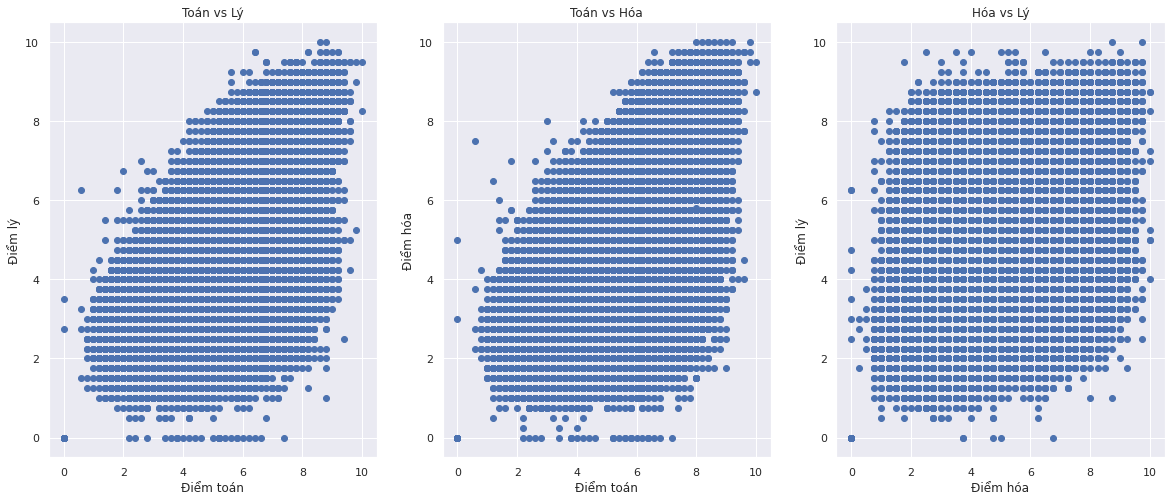

In [ ]:
# Biểu đồ phân tán thể hiện mỗi tương quan dữ liệu trong điểm thi khối A các tỉnh thành còn lại
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
plt.scatter(khoi_cac_tinh_con_lai['Toan'],khoi_cac_tinh_con_lai['Ly'])
plt.title('Toán vs Lý')
plt.xlabel('Điểm toán')
plt.ylabel('Điểm lý')

plt.subplot(1,3,2)
plt.scatter(khoi_cac_tinh_con_lai['Toan'],khoi_cac_tinh_con_lai['Hoa'])
plt.title('Toán vs Hóa')
plt.xlabel('Điểm toán')
plt.ylabel('Điểm hóa')

plt.subplot(1,3,3)
plt.scatter(khoi_cac_tinh_con_lai['Hoa'],khoi_cac_tinh_con_lai['Ly'])
plt.title('Hóa vs Lý')
plt.xlabel('Điểm hóa')
plt.ylabel('Điểm lý')

plt.show()

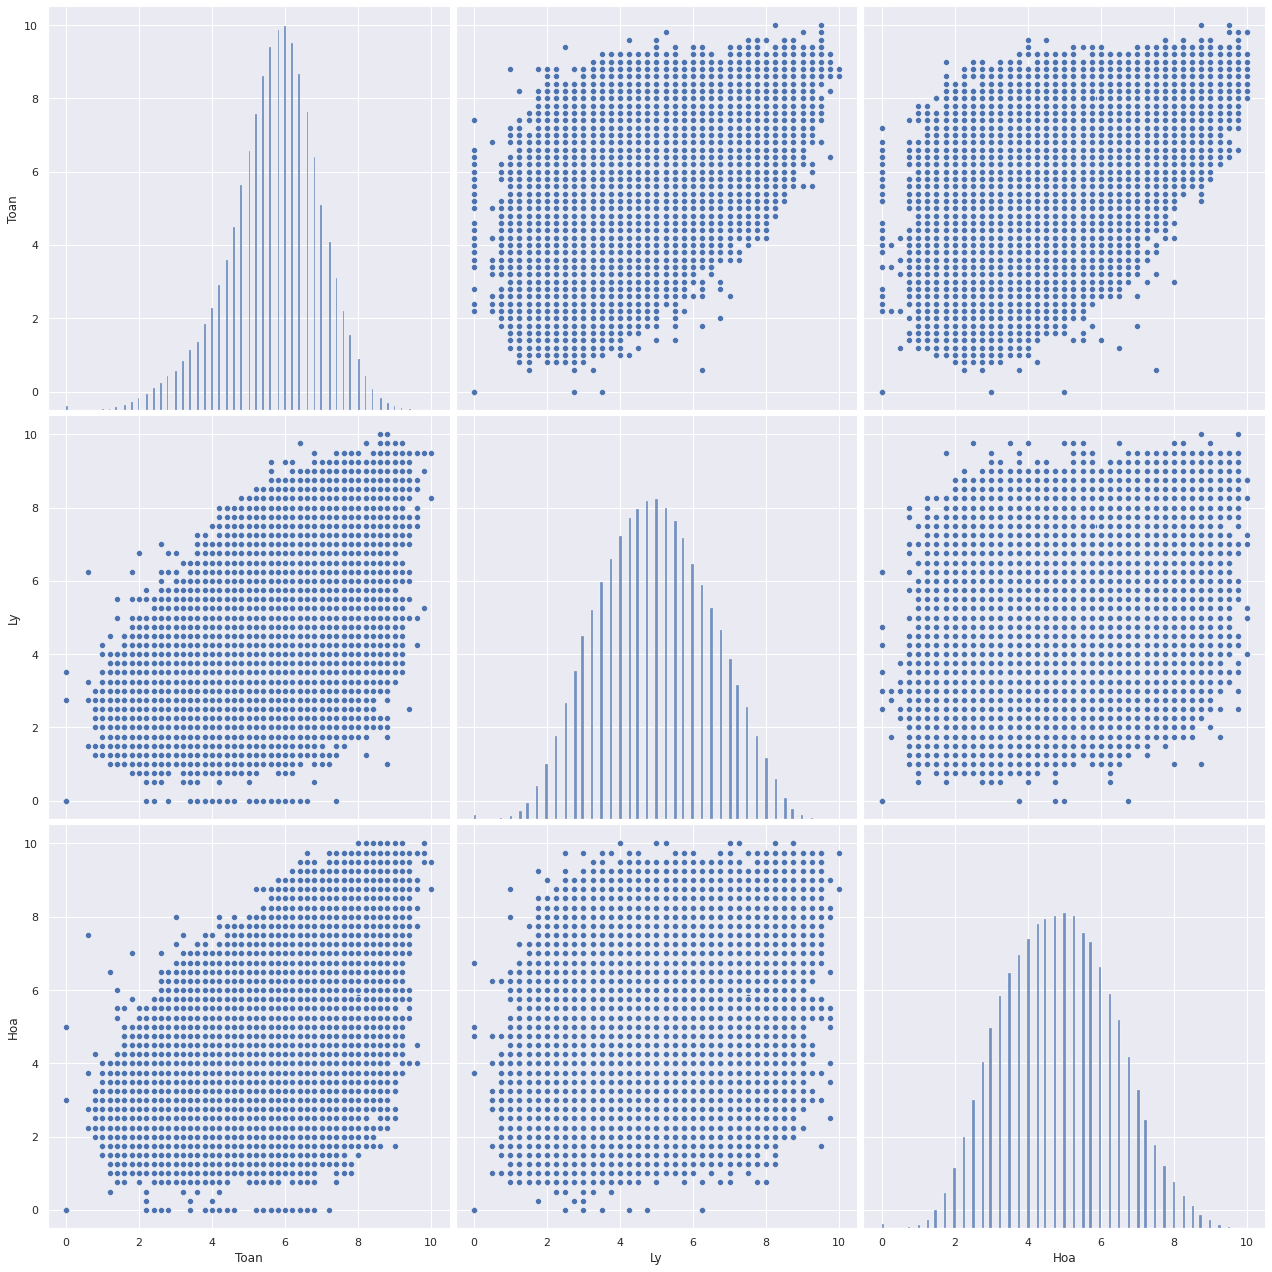

In [ ]:
# Biểu pair plot kết hợp giữa scatter plot và distribution plot cho điểm khối A ở các tỉnh thành còn lại
sns.pairplot(khoi_cac_tinh_con_lai[['Toan', 'Ly', 'Hoa']], height=6, aspect=6/6)
plt.show()

In [ ]:
khoi_a_ha_giang[['Toan', 'Ly', 'Hoa']].describe()

,Toan,Ly,Hoa
count,581.000000,581.000000,581.000000
mean,4.740448,4.215577,4.130809
std,1.999784,2.052883,1.851227
min,1.000000,1.000000,0.750000
25%,3.000000,2.750000,2.750000
50%,4.600000,3.750000,3.750000
75%,6.000000,5.250000,5.250000
max,9.600000,9.750000,9.750000


In [ ]:
khoi_cac_tinh_con_lai[['Toan', 'Ly', 'Hoa']].describe()

,Toan,Ly,Hoa
count,320651.000000,320651.000000,320651.000000
mean,5.699378,4.965741,4.862921
std,1.232200,1.526198,1.515731
min,0.000000,0.000000,0.000000
25%,5.000000,3.750000,3.750000
50%,5.800000,5.000000,4.750000
75%,6.600000,6.000000,6.000000
max,10.000000,10.000000,10.000000


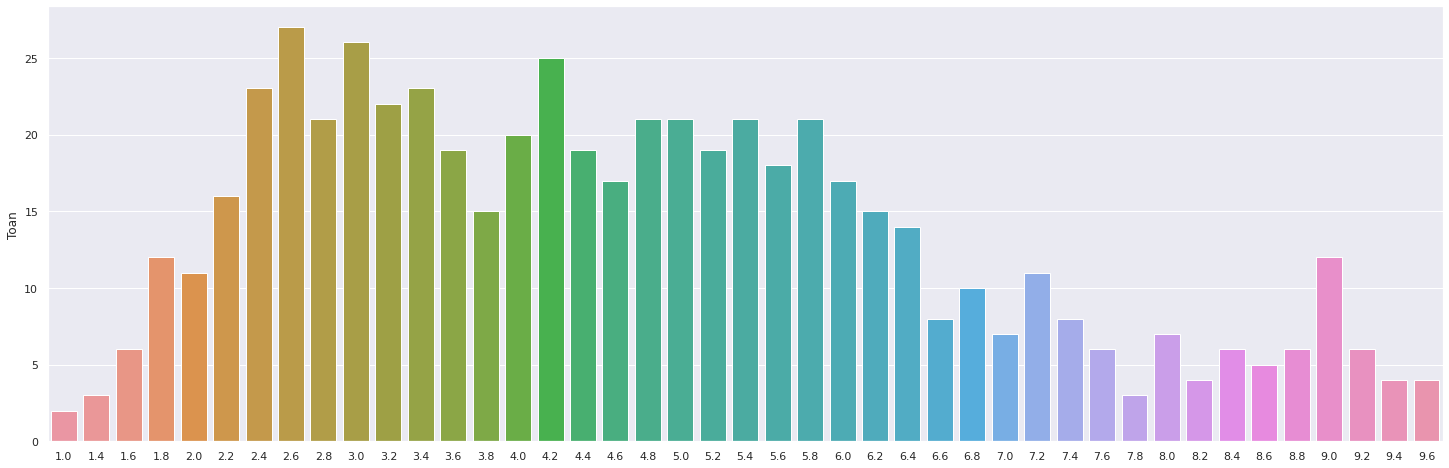

In [ ]:
# Biểu đồ barplot đếm số lượng điểm thi môn Toán ở Hà Giang
plt.figure(figsize = (25,8))
sns.barplot(x=khoi_a_ha_giang.Toan.value_counts().index, y=khoi_a_ha_giang.Toan.value_counts())

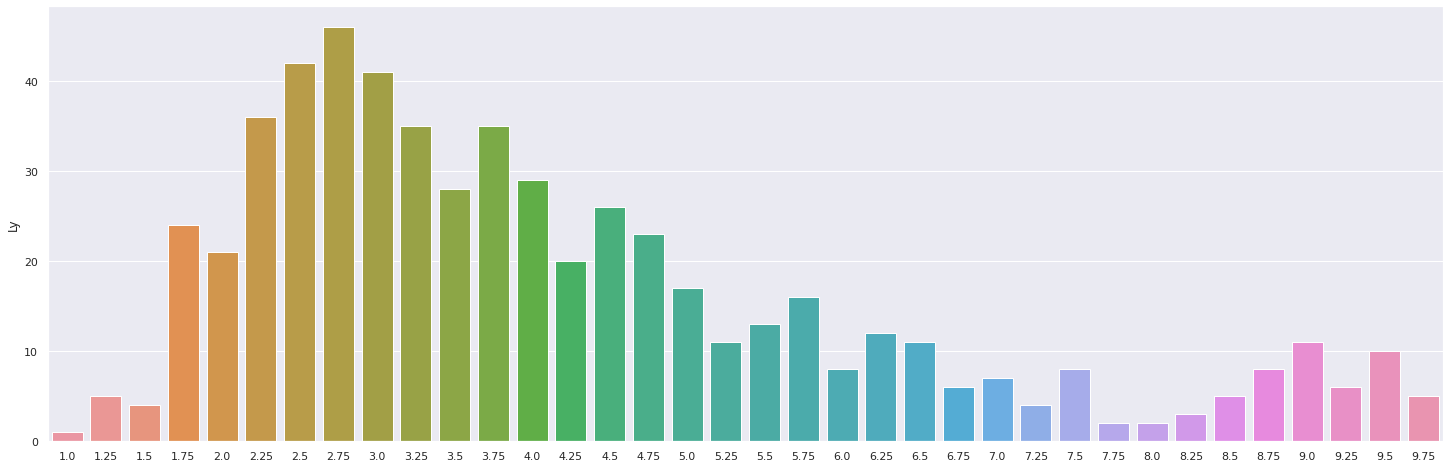

In [ ]:
# Biểu đồ barplot đếm số lượng điểm thi môn Lý ở Hà Giang
plt.figure(figsize = (25,8))
sns.barplot(x=khoi_a_ha_giang.Ly.value_counts().index, y=khoi_a_ha_giang.Ly.value_counts())

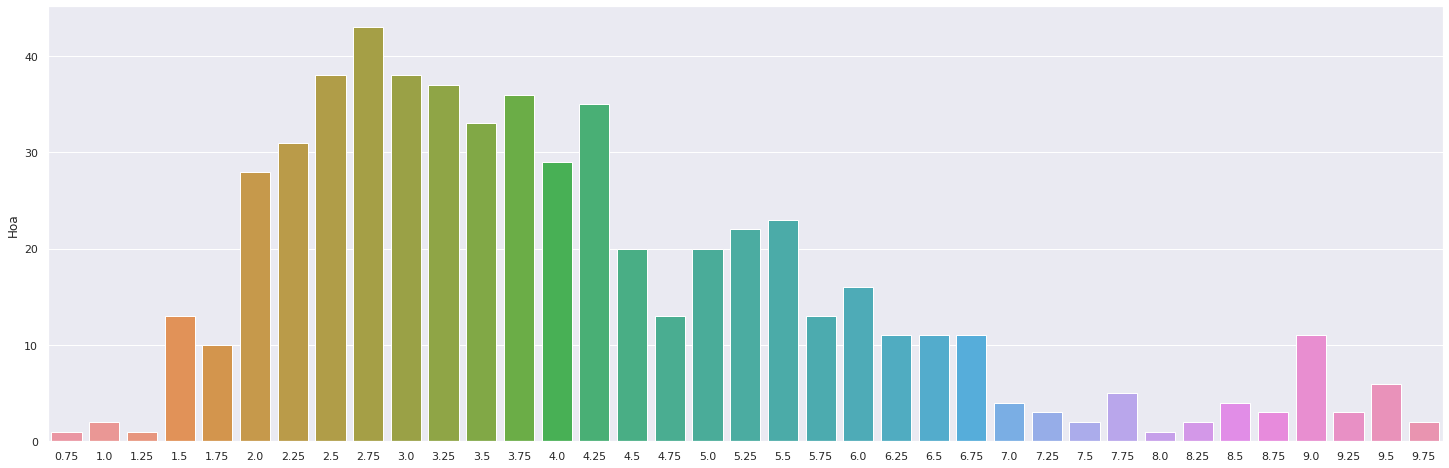

In [ ]:
# Biểu đồ barplot đếm số lượng điểm thi môn Hóa ở Hà Giang
plt.figure(figsize = (25,8))
sns.barplot(x=khoi_a_ha_giang.Hoa.value_counts().index, y=khoi_a_ha_giang.Hoa.value_counts())

# Tỉ lệ điểm số lớn hơn 8 và nhỏ hơn bằng 2 của Hà Giang, Hà Nội, Thành phố Hồ Chí Minh, cả nước

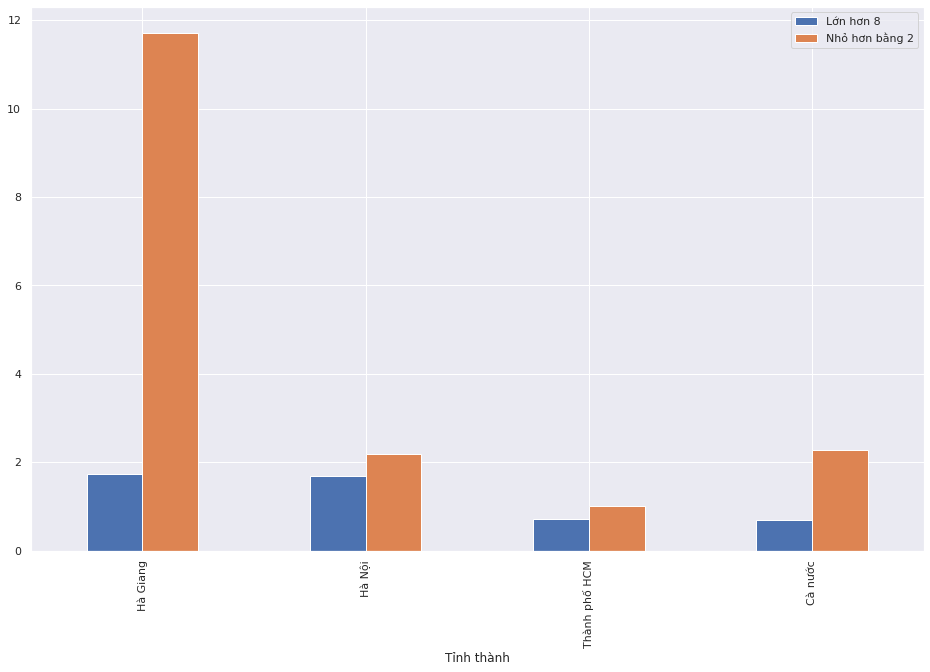

In [ ]:
# Rút trích thông tin điểm
math_df_ha_giang = df[df['code'] == 5]['Toan']
math_df_ha_ha_noi = df[df['code'] == 1]['Toan']
math_df_ha_tp_hcm = df[df['code'] == 2]['Toan']
math_df_ca_nuoc = df['Toan']

# Đưa vào data frame
ti_le = pd.DataFrame({
    'Tỉnh thành': ['Hà Giang', 'Hà Nội', 'Thành phố HCM', 'Cà nước'],
    'Lớn hơn 8': [len(math_df_ha_giang[math_df_ha_giang > 8])/ len(math_df_ha_giang) * 100, len(math_df_ha_ha_noi[math_df_ha_ha_noi > 8])/ len(math_df_ha_ha_noi) * 100, len(math_df_ha_tp_hcm[math_df_ha_tp_hcm > 8])/ len(math_df_ha_tp_hcm) * 100, len(math_df_ca_nuoc[math_df_ca_nuoc > 8])/ len(math_df_ca_nuoc) * 100], 
    'Nhỏ hơn bằng 2': [len(math_df_ha_giang[math_df_ha_giang <= 2])/ len(math_df_ha_giang) * 100, len(math_df_ha_ha_noi[math_df_ha_ha_noi <= 2])/ len(math_df_ha_ha_noi) * 100, len(math_df_ha_tp_hcm[math_df_ha_tp_hcm <= 2])/ len(math_df_ha_tp_hcm) * 100,len(math_df_ca_nuoc[math_df_ca_nuoc <= 2])/ len(math_df_ca_nuoc) * 100]
})

# Set index
ti_le = ti_le.set_index(ti_le["Tỉnh thành"])

# Trực quan hóa bằng bar plot
ti_le.plot(kind='bar', figsize=(16,10))

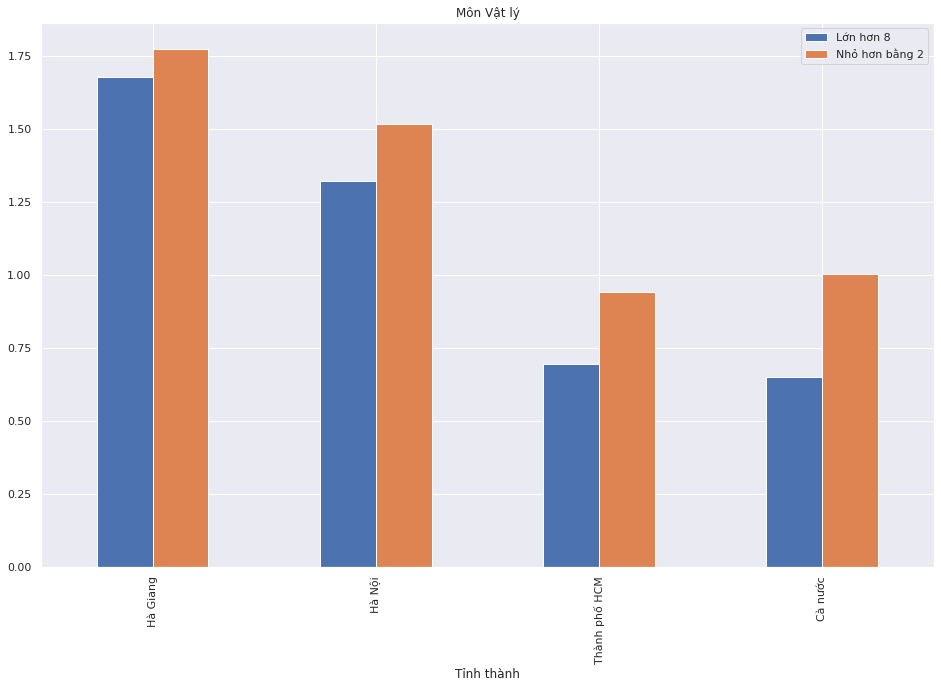

In [ ]:
# Rút trích thông tin
phy_df_ha_giang = df[df['code'] == 5]['Ly']
phy_df_ha_ha_noi = df[df['code'] == 1]['Ly']
phy_df_ha_tp_hcm = df[df['code'] == 2]['Ly']
phy_df_ca_nuoc = df['Ly']

# Đưa vào data frame
ti_le = pd.DataFrame({
    'Tỉnh thành': ['Hà Giang', 'Hà Nội', 'Thành phố HCM', 'Cà nước'],
    'Lớn hơn 8': [len(phy_df_ha_giang[phy_df_ha_giang > 8])/ len(phy_df_ha_giang) * 100, len(phy_df_ha_ha_noi[phy_df_ha_ha_noi > 8])/ len(phy_df_ha_ha_noi) * 100, len(phy_df_ha_tp_hcm[phy_df_ha_tp_hcm > 8])/ len(phy_df_ha_tp_hcm) * 100, len(phy_df_ca_nuoc[phy_df_ca_nuoc > 8])/ len(phy_df_ca_nuoc) * 100], 
    'Nhỏ hơn bằng 2': [len(phy_df_ha_giang[phy_df_ha_giang <= 2])/ len(phy_df_ha_giang) * 100, len(phy_df_ha_ha_noi[phy_df_ha_ha_noi <= 2])/ len(phy_df_ha_ha_noi) * 100, len(phy_df_ha_tp_hcm[phy_df_ha_tp_hcm <= 2])/ len(phy_df_ha_tp_hcm) * 100,len(phy_df_ca_nuoc[phy_df_ca_nuoc <= 2])/ len(phy_df_ca_nuoc) * 100]
})

# Set indexs
ti_le = ti_le.set_index(ti_le["Tỉnh thành"])

# Trực quan
ti_le.plot(kind='bar', figsize=(16,10), title='Môn Vật lý')

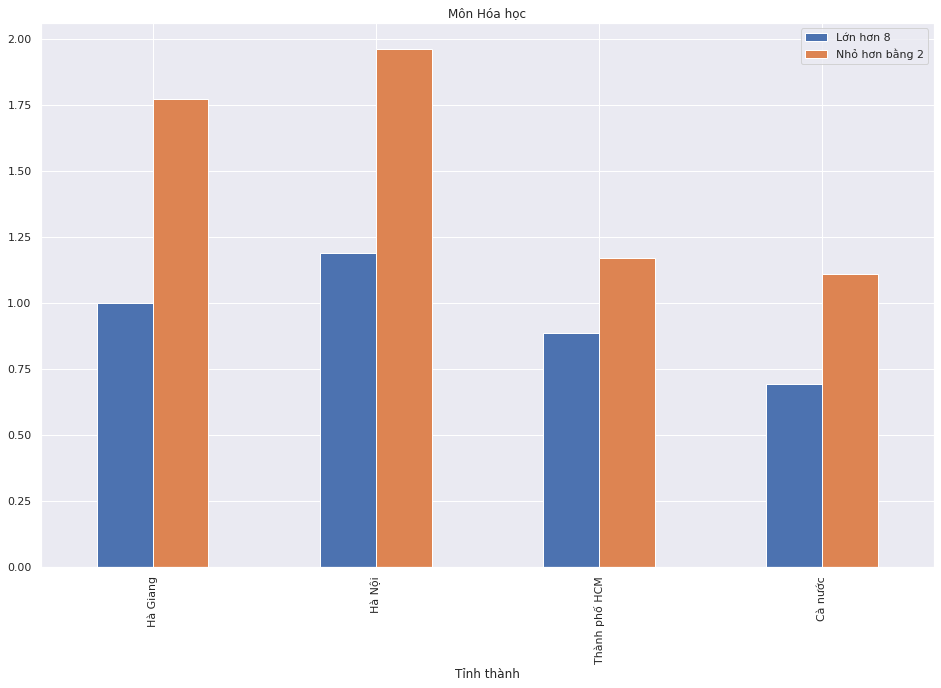

In [ ]:
# Rút trích thông tin điểm cần lấy: Môn hóa
chem_df_ha_giang = df[df['code'] == 5]['Hoa']
chem_df_ha_ha_noi = df[df['code'] == 1]['Hoa']
chem_df_ha_tp_hcm = df[df['code'] == 2]['Hoa']
chem_df_ca_nuoc = df['Hoa']

# Đưa vào data frame
ti_le = pd.DataFrame({
    'Tỉnh thành': ['Hà Giang', 'Hà Nội', 'Thành phố HCM', 'Cà nước'],
    'Lớn hơn 8': [len(chem_df_ha_giang[chem_df_ha_giang > 8])/ len(chem_df_ha_giang) * 100, len(chem_df_ha_ha_noi[chem_df_ha_ha_noi > 8])/ len(chem_df_ha_ha_noi) * 100, len(chem_df_ha_tp_hcm[chem_df_ha_tp_hcm > 8])/ len(chem_df_ha_tp_hcm) * 100, len(chem_df_ca_nuoc[chem_df_ca_nuoc > 8])/ len(chem_df_ca_nuoc) * 100], 
    'Nhỏ hơn bằng 2': [len(chem_df_ha_giang[chem_df_ha_giang <= 2])/ len(chem_df_ha_giang) * 100, len(chem_df_ha_ha_noi[chem_df_ha_ha_noi <= 2])/ len(chem_df_ha_ha_noi) * 100, len(chem_df_ha_tp_hcm[chem_df_ha_tp_hcm <= 2])/ len(chem_df_ha_tp_hcm) * 100,len(chem_df_ca_nuoc[chem_df_ca_nuoc <= 2])/ len(chem_df_ca_nuoc) * 100]
})

# Set indexs
ti_le = ti_le.set_index(ti_le["Tỉnh thành"])

# Trực quan hóa dữ liệu
ti_le.plot(kind='bar', figsize=(16,10), title='Môn Hóa học')

# Trực quan hóa phổ điểm từng môn

In [ ]:
HaGiang_dataset = df[df['code'] == 5]
Table = df 

def PhoDiem(mon, fig, tl):
    tbl = Table[mon].value_counts()/Table[mon].count()
    hg = HaGiang_dataset[mon].value_counts()/HaGiang_dataset[mon].count()
    df = pd.DataFrame({"Cả nước": tbl, "Hà Giang": hg})
    df.sort_index().plot.bar(figsize=fig, title=tl)

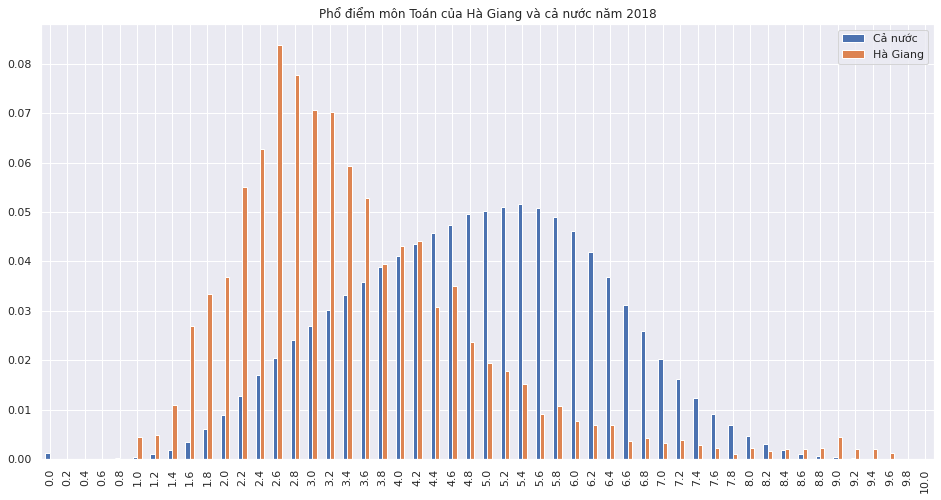

In [ ]:
PhoDiem('Toan',(16,8), "Phổ điểm môn Toán của Hà Giang và cả nước năm 2018")

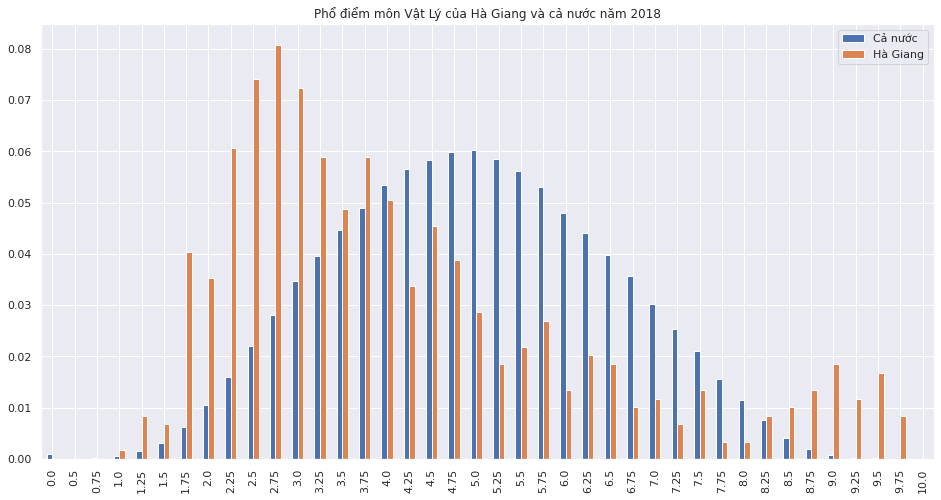

In [ ]:
PhoDiem('Ly',(16,8), "Phổ điểm môn Vật Lý của Hà Giang và cả nước năm 2018")

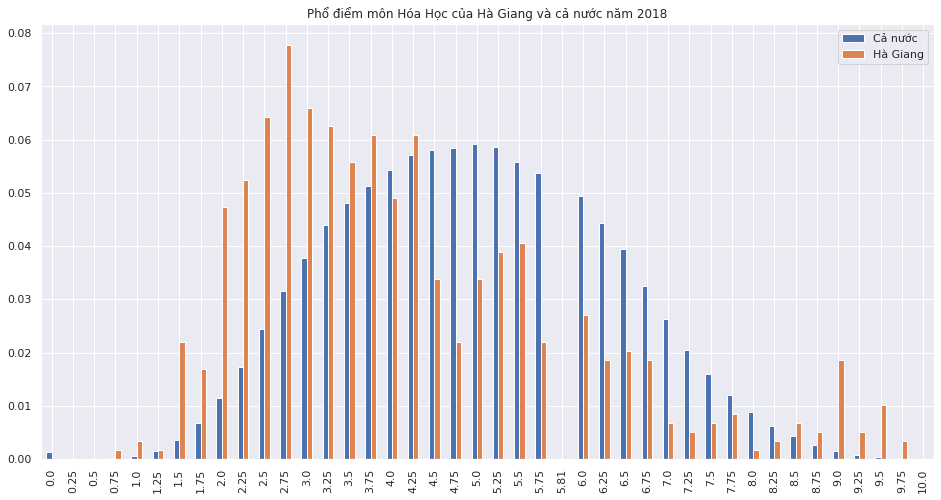

In [ ]:
PhoDiem('Hoa',(16,8), "Phổ điểm môn Hóa Học của Hà Giang và cả nước năm 2018")

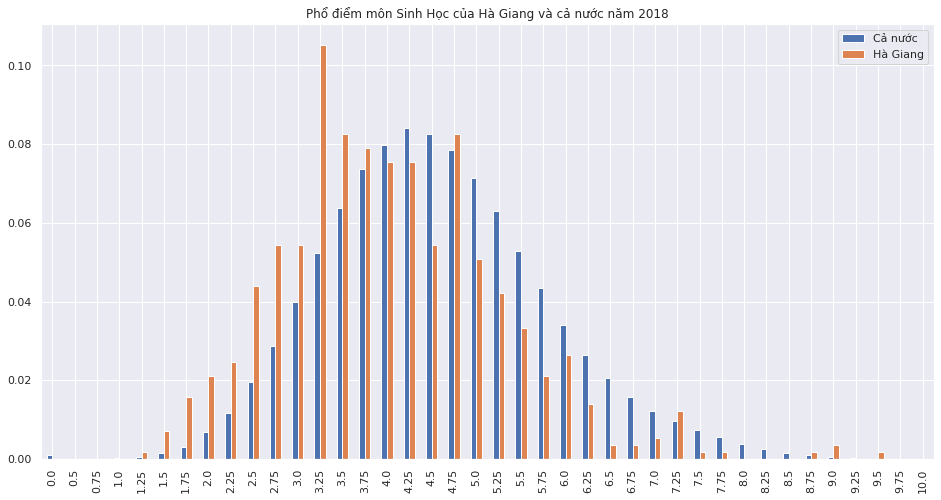

In [ ]:
PhoDiem('Sinh',(16,8), "Phổ điểm môn Sinh Học của Hà Giang và cả nước năm 2018")

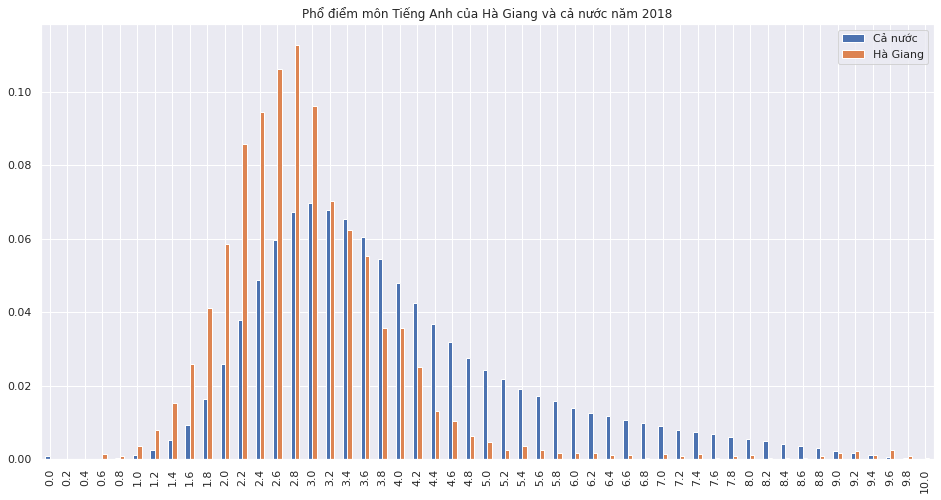

In [ ]:
PhoDiem('Anh',(16,8), "Phổ điểm môn Tiếng Anh của Hà Giang và cả nước năm 2018")

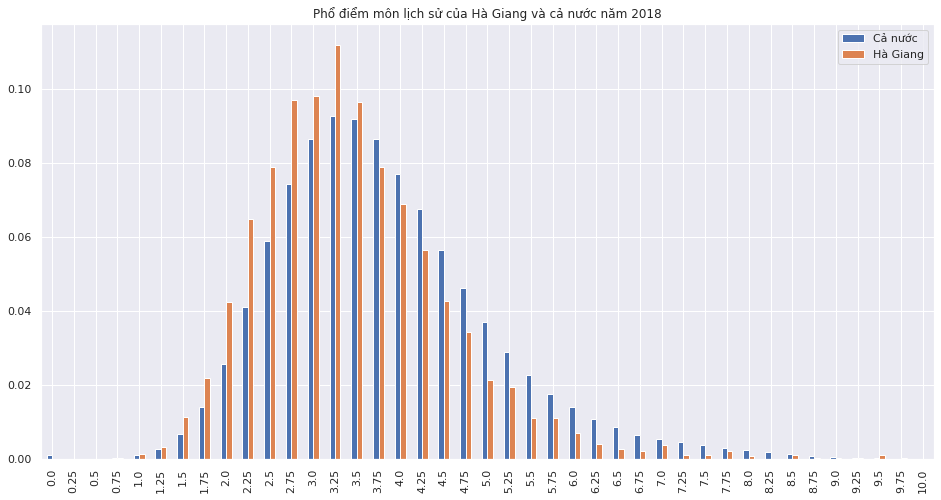

In [ ]:
PhoDiem('Su',(16,8), "Phổ điểm môn lịch sử của Hà Giang và cả nước năm 2018")

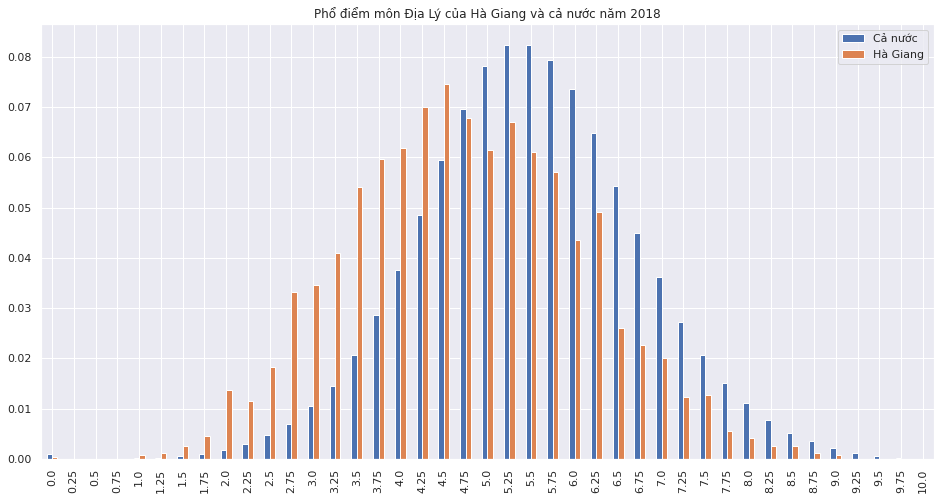

In [ ]:
PhoDiem('Dia',(16,8), "Phổ điểm môn Địa Lý của Hà Giang và cả nước năm 2018")

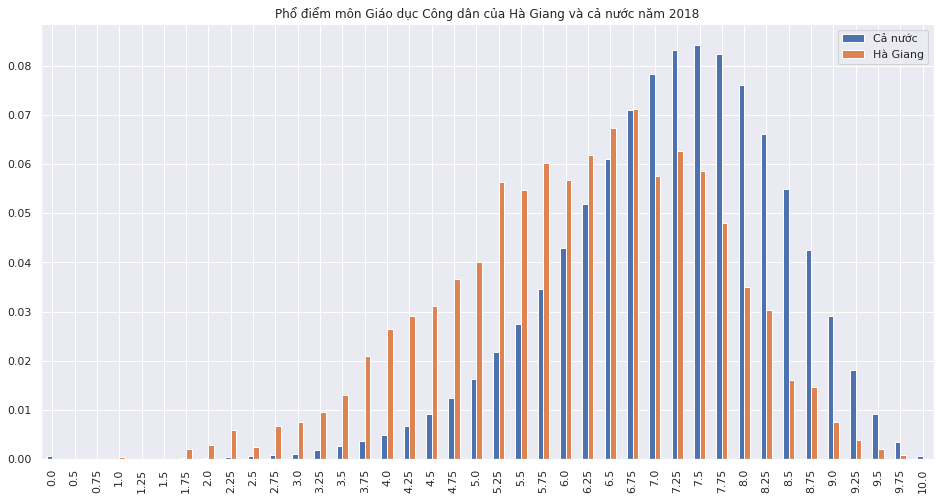

In [ ]:
PhoDiem('GDCD',(16,8), "Phổ điểm môn Giáo dục Công dân của Hà Giang và cả nước năm 2018")